# ***Heart Disease Prediction***

<!-- ![image.png](attachment:177e4204-200e-45f9-91a8-488798f650a7.png) -->


----
# ***Table Of Content***
---

1. [About Dataset](#1-about-dataset)
2. [Importing The Libraries](#2-importing-the-libraries)
3. [Basic Explorations](#3-basic-explorations)
    1. Loading Dataset
    2. Quick Overview 
    3. Shape of dataset
    4. Null Values in Dataset
    5. Duplicates Values in Datasets  
4. [Exploring the Train Dataset](#4-exploring-the-train-dataset)
    1. Data Summary
    2. Descriptive View Of data
    3. Null Values Of data
    4. Duplicates Values Of data
5. [Lets Visualize the data](#5-lets-visualize-the-data)
    1. Univariate Analysis
    2. Exited column ( Target - Analysis)
    3. Bi-variate Analysis
6. [Preprocess Data](#6-preprocess-data)
    1. Extract & Adding Features
    2. Build a Pipelines
    3. Split Data    
7. [Model Building](#7-model-building)
    1. Desistion Tree Classifier
    2. Xgboost Classifier
    3. CatBoost Classifier
8. [Evaluation and Fine Tuning](#8-evaluation-and-fine-tuning)
9. [Build a Full Pipline To Deploy](#9-build-a-full-pipline-to-deploy)
10. [Save a Pipline](#10-save-a-pipline)

   

----
# ***1. About Dataset***
---

`Title:` ***Heart Disease Prediction Binary Classification***

`Dataset:` [link](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data/data)

- *`id:`* Unique identifier for each patient.
- *`age:`* Age of the patient in years.
- *`origin:`* Place of study.
- *`sex:`* Gender of the patient (Male/Female).
- *`cp:`* Chest pain type.
  - Possible values: 
    - Typical angina
    - Atypical angina
    - Non-anginal
    - Asymptomatic
- *`trestbps:`* Resting blood pressure (in mm Hg on admission to the hospital).
- *`chol:`* Serum cholesterol level in mg/dl.
- *`fbs:`* Fasting blood sugar level (if fasting blood sugar > 120 mg/dl).
- *`restecg:`* Resting electrocardiographic results.
  - Possible values: 
    - Normal
    - ST-T abnormality
    - Left ventricular hypertrophy
- *`thalach:`* Maximum heart rate achieved.
- *`exang:`* Exercise-induced angina.
  - Values: True/False
- *`oldpeak:`* ST depression induced by exercise relative to rest.
- *`slope:`* The slope of the peak exercise ST segment.
- *`ca:`* Number of major vessels (0-3) colored by fluoroscopy.
- *`thal:`* Thallium stress test result.
  - Possible values: 
    - Normal
    - Fixed defect
    - Reversible defect
- *`num:`* The predicted attribute.

----
# ***2. Importing The Libraries***
---

In [1]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd
from termcolor import colored

import warnings 
warnings.filterwarnings('ignore')

In [2]:
#preprocessing

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder , LabelEncoder
from category_encoders import TargetEncoder
from sklearn.impute import SimpleImputer ,KNNImputer
from sklearn.experimental import enable_iterative_imputer

from sklearn.impute import IterativeImputer
#models
from sklearn.linear_model import LinearRegression
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier , RandomForestRegressor

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble  import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostClassifier
import lightgbm as lgb
import xgboost as xgb

# Acu and Error 
from sklearn.metrics import (
    confusion_matrix,
    precision_recall_curve,
    ConfusionMatrixDisplay,
    precision_score,
    recall_score,
    roc_curve,
    auc,
    f1_score,
    mean_absolute_error , mean_squared_error , r2_score  , accuracy_score
)

# Save Pipline 
import joblib

----
# ***3. Basic Explorations***
---

> ####  _**3.1 Loading the Dataset**_

In [3]:
data = pd.read_csv('heart_disease_uci.csv')

> #### ***3.2 Quick Overview***

In [4]:
data.head()

id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0

> #### ***3.3 Shape of Datasets***

In [5]:
# Checking the number of rows and columns

num_train_rows, num_train_columns = data.shape

print("Data:")
print(f"Number of Rows: {num_train_rows}")
print(f"Number of Columns: {num_train_columns}\n")

Data:
Number of Rows: 920
Number of Columns: 16



> #### ***3.4 Null Values in Datasets***

In [6]:
# Null Values in Train 
data_null = data.isnull().sum().sum()

print(f'Null Count in Data: {data_null}')


Null Count in Data: 1759


> #### ***3.5 Duplicates Values in Datasets***

In [7]:
# Count duplicate rows in train_data
data_duplicates = data.duplicated().sum()



# Print the results
print(f"Number of duplicate rows in train_data: {data_duplicates}")


Number of duplicate rows in train_data: 0


----
# ***4. Exploring the Train Dataset***
---

> #### ***4.1 Data Summary***

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


- *There are `920` rows and `16` columns in the dataset.*
- *The columns having `float` datatypes are `5`, `integer` datatype `3`, `object` datatype are `8`*
- *The data contain  missing values*
- *The target variable in the dataset is `num`.*

> #### ***4.2 Descriptive View Of data***

In [9]:
data.describe()

id         age    trestbps        chol      thalch     oldpeak  \
count  920.000000  920.000000  861.000000  890.000000  865.000000  858.000000   
mean   460.500000   53.510870  132.132404  199.130337  137.545665    0.878788   
std    265.725422    9.424685   19.066070  110.780810   25.926276    1.091226   
min      1.000000   28.000000    0.000000    0.000000   60.000000   -2.600000   
25%    230.750000   47.000000  120.000000  175.000000  120.000000    0.000000   
50%    460.500000   54.000000  130.000000  223.000000  140.000000    0.500000   
75%    690.250000   60.000000  140.000000  268.000000  157.000000    1.500000   
max    920.000000   77.000000  200.000000  603.000000  202.000000    6.200000   

               ca         num  
count  309.000000  920.000000  
mean     0.676375    0.995652  
std      0.935653    1.142693  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    1.000000  
75%      1.000000    2.000000  
max      3.000000    4.000000

In [10]:
data.describe(include = ['O'])

sex    dataset            cp    fbs restecg  exang slope    thal
count    920        920           920    830     918    865   611     434
unique     2          4             4      2       3      2     3       3
top     Male  Cleveland  asymptomatic  False  normal  False  flat  normal
freq     726        304           496    692     551    528   345     196

> #### ***4.3 Null Values Of data***

In [11]:
print(colored('Null values in data :', 'red'))
print(data.isnull().sum())

Null values in data :
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


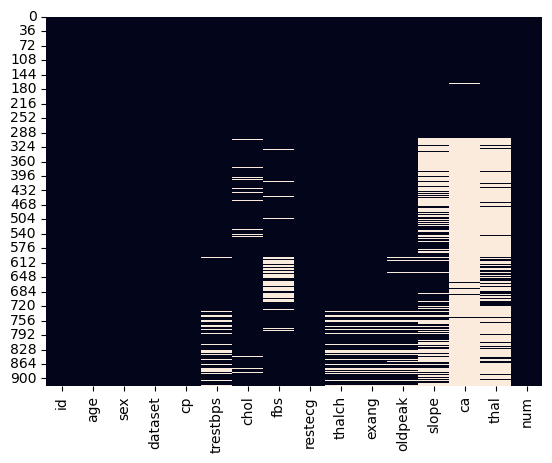

In [12]:
# visual proof 
sns.heatmap(data.isnull(), cbar=False)
plt.show()

> #### ***4.4 Duplicates Values Of data***

In [13]:
# Count duplicate rows in train_data
train_duplicates = data.duplicated().sum()

# Print the results
print(f"Number of duplicate rows in train_data: {train_duplicates}")


Number of duplicate rows in train_data: 0


In [14]:
data.drop(columns=['id', 'dataset']  , inplace=True)

In [22]:
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

*Select Category and Numerical Columns for Analysis*

----
# ***5. Lets Visualize the data***
---

In [23]:
from pandas_profiling import ProfileReport

In [24]:
profile = ProfileReport(data)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [25]:
palette = [ '#0077B6' , '#0096C7' , '#00b4d8' , '#90e0ef' , '#caf0f8']
color_palette = sns.color_palette(palette)

sns.set_style('whitegrid')

In [26]:
data.describe()

age    trestbps        chol      thalch     oldpeak          ca  \
count  920.000000  861.000000  890.000000  865.000000  858.000000  309.000000   
mean    53.510870  132.132404  199.130337  137.545665    0.878788    0.676375   
std      9.424685   19.066070  110.780810   25.926276    1.091226    0.935653   
min     28.000000    0.000000    0.000000   60.000000   -2.600000    0.000000   
25%     47.000000  120.000000  175.000000  120.000000    0.000000    0.000000   
50%     54.000000  130.000000  223.000000  140.000000    0.500000    0.000000   
75%     60.000000  140.000000  268.000000  157.000000    1.500000    1.000000   
max     77.000000  200.000000  603.000000  202.000000    6.200000    3.000000   

              num  
count  920.000000  
mean     0.995652  
std      1.142693  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      2.000000  
max      4.000000

> ### ***5.1 Univariate Analysis***

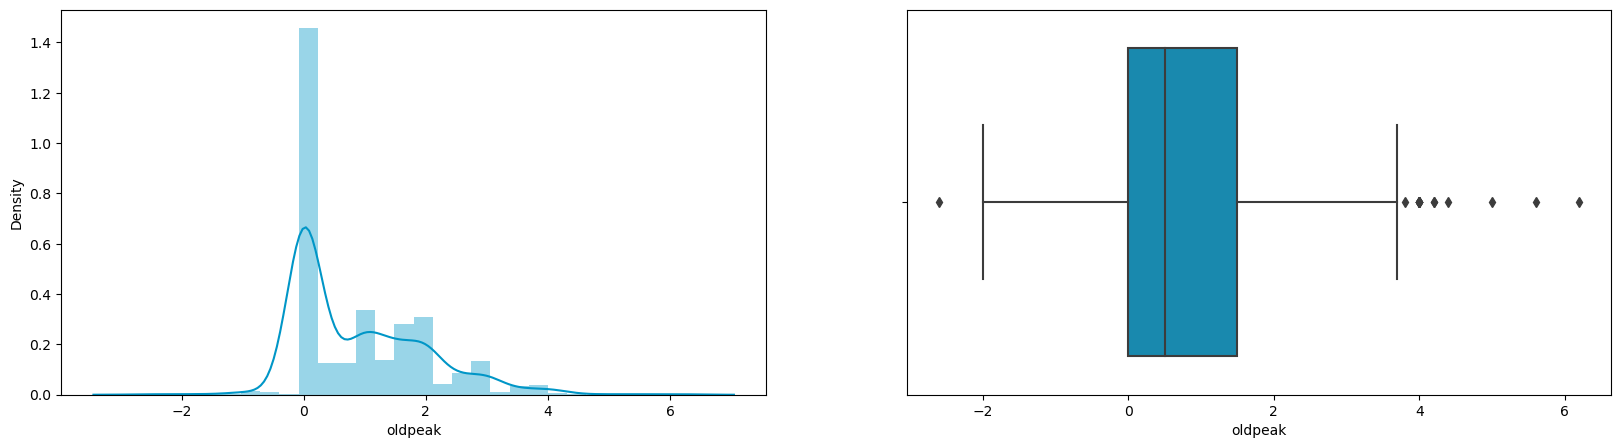

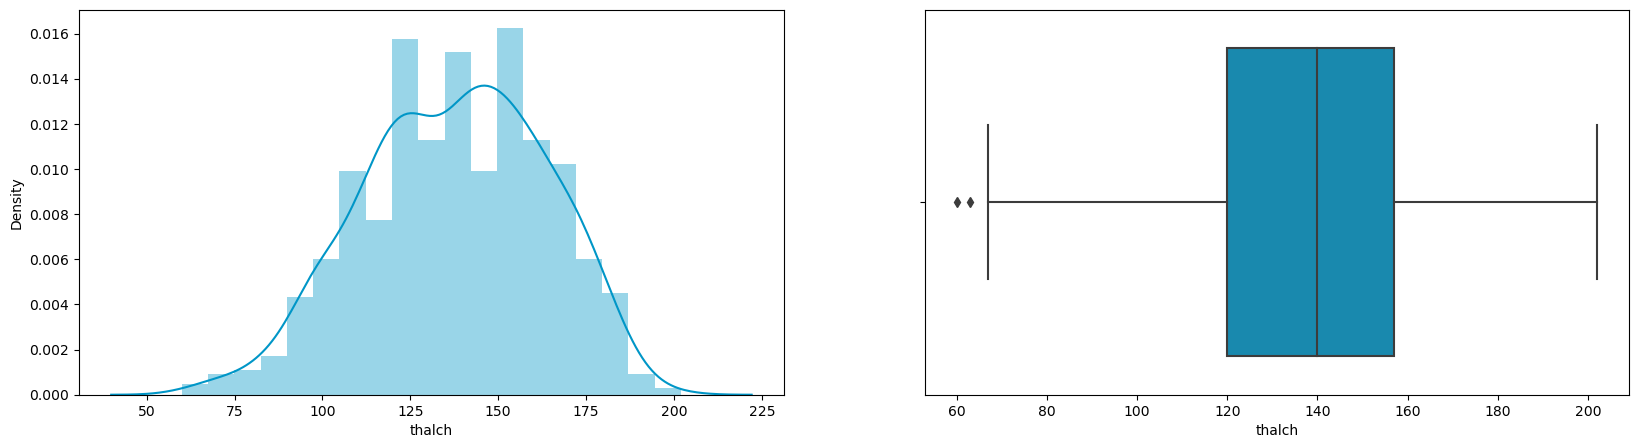

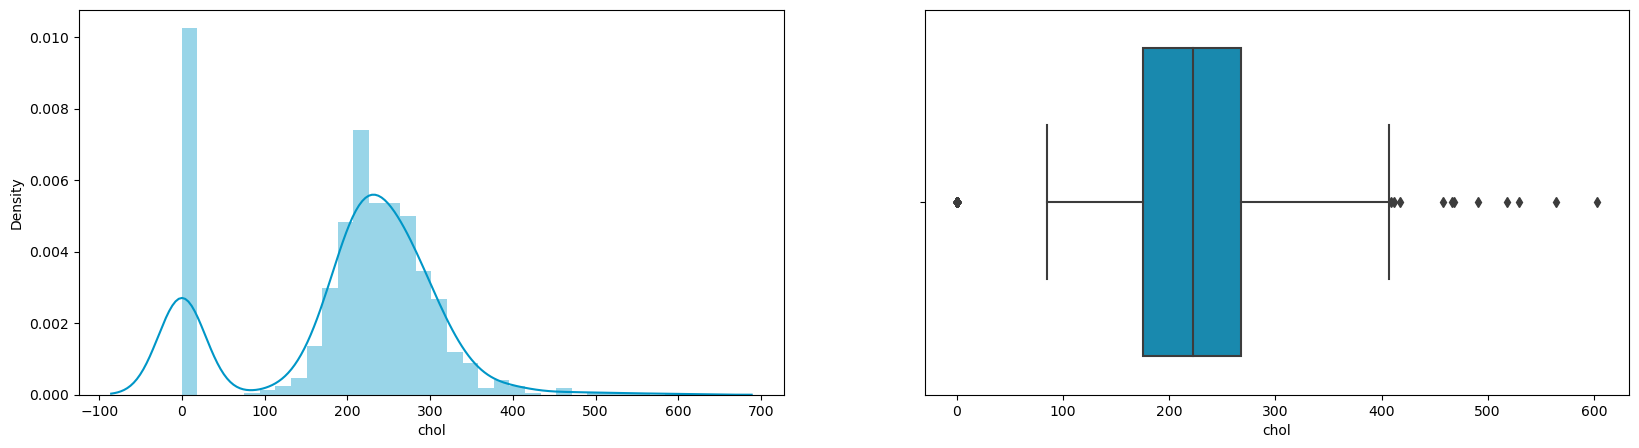

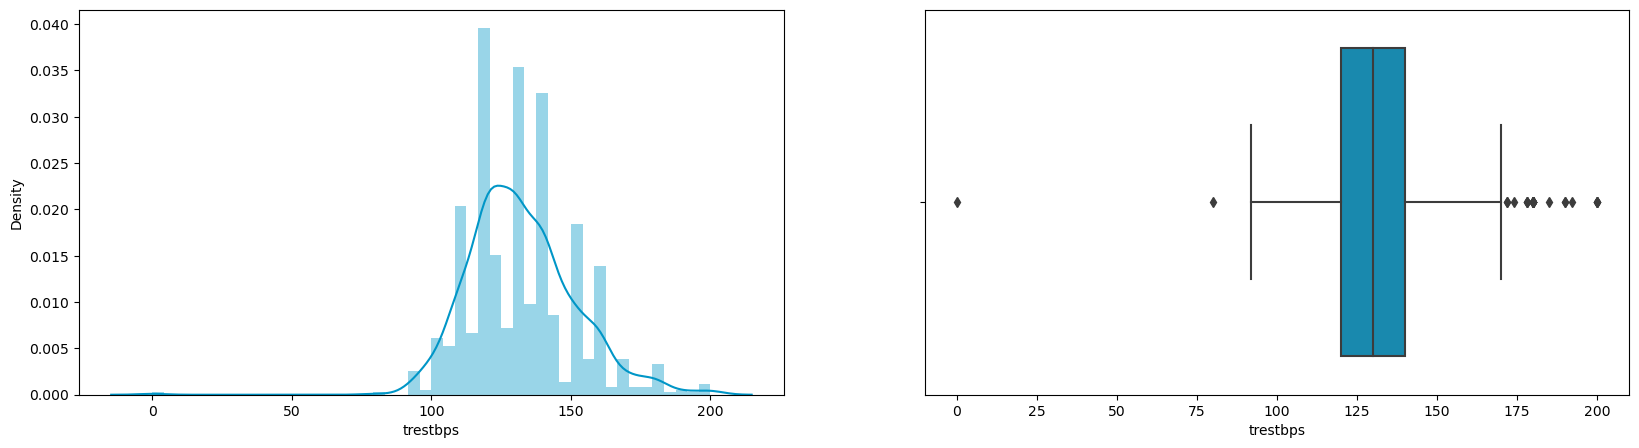

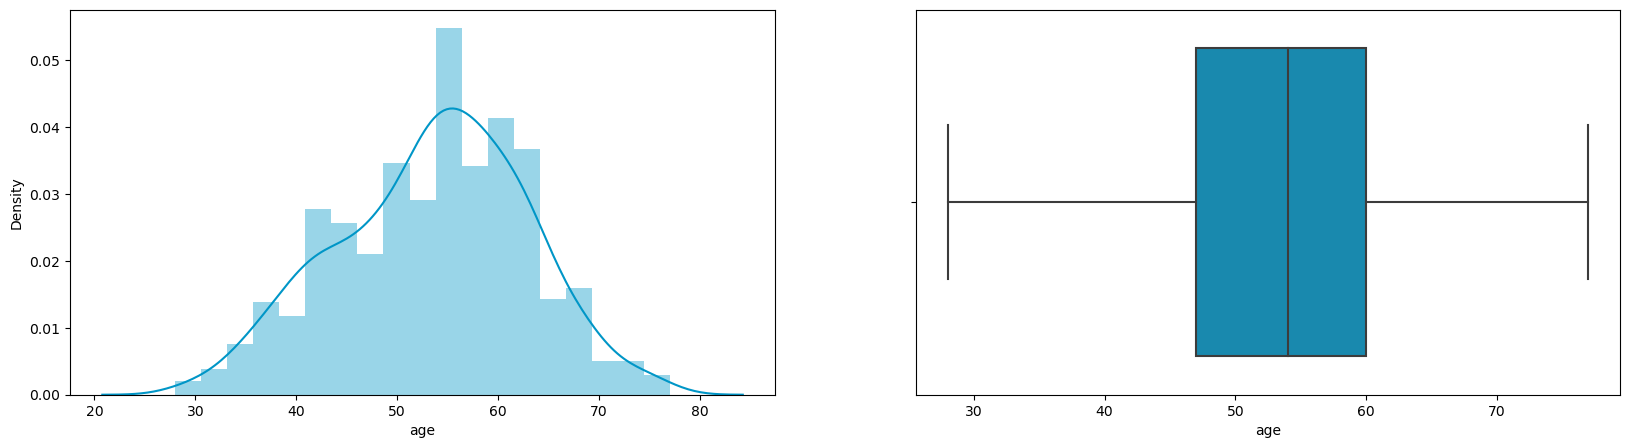

In [27]:
for col in numeric_cols:
    fig, ax = plt.subplots(1, 2, figsize=(20, 5))
    sns.distplot(data[col], ax=ax[0] , color=palette[1])  
    sns.boxplot(x=data[col], ax=ax[1] ,  palette=palette[1:])

- Outliers Have some Meaningfull Insight , so we Cannot remove them . Leave them in the Dataset .

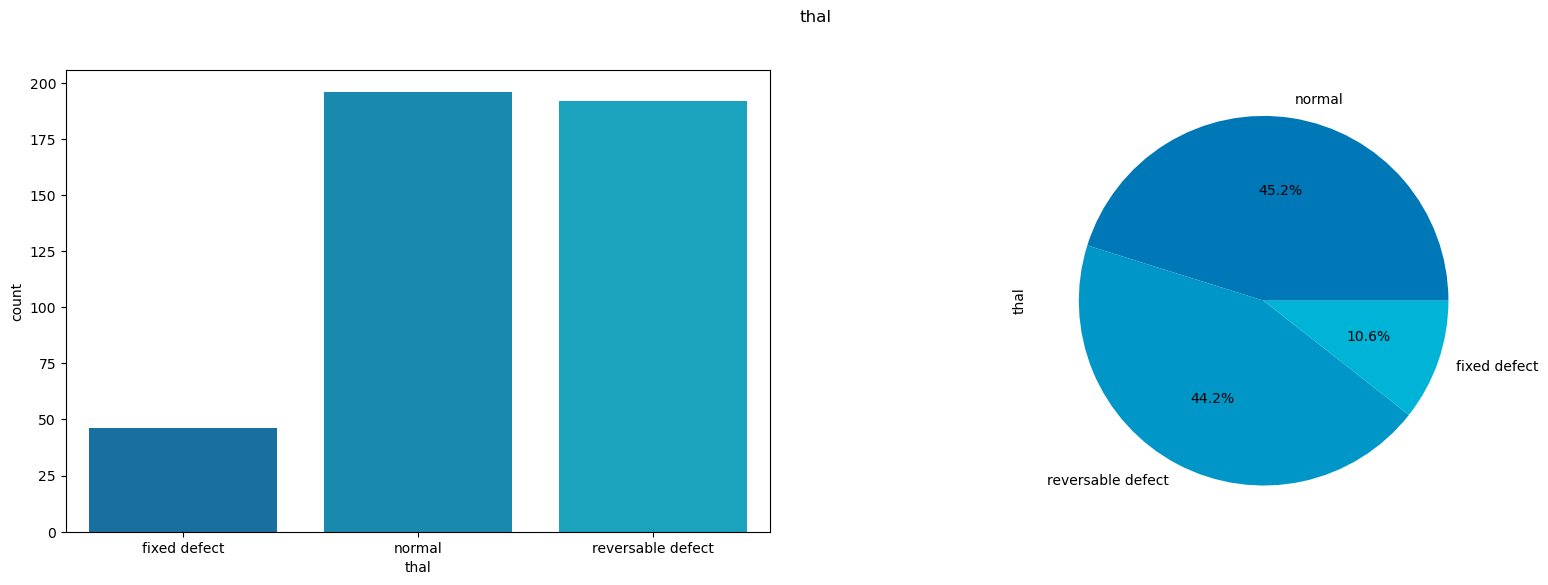

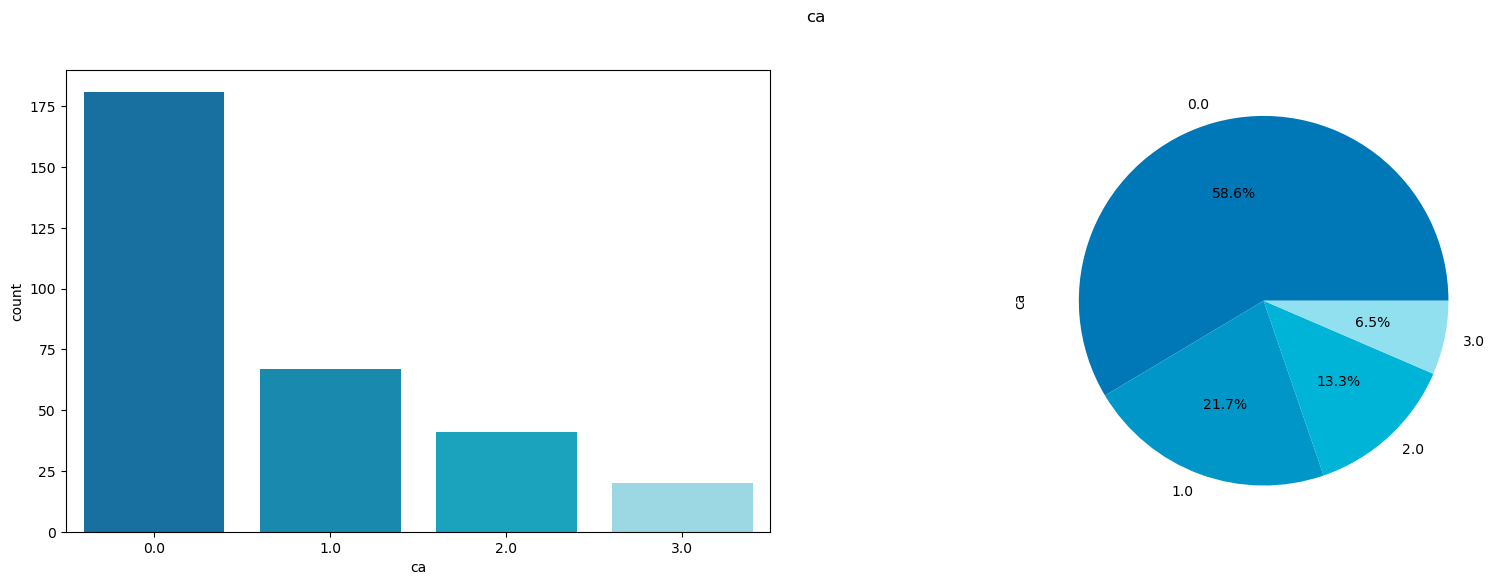

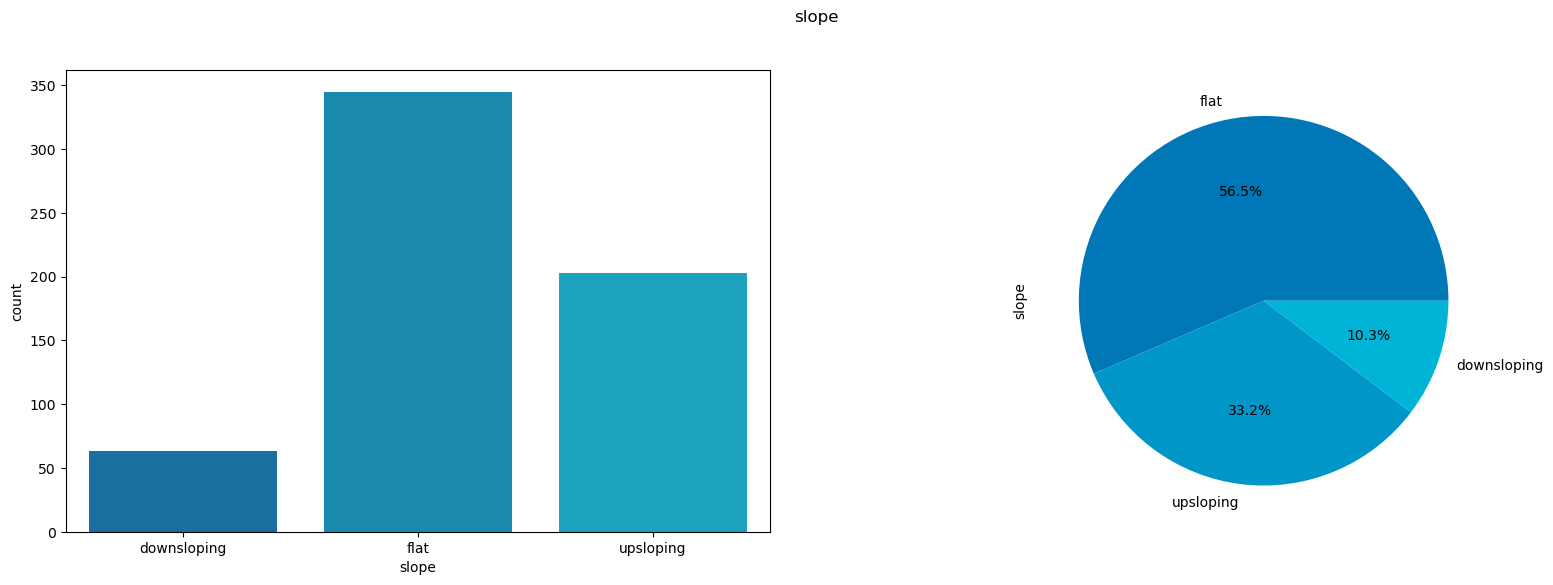

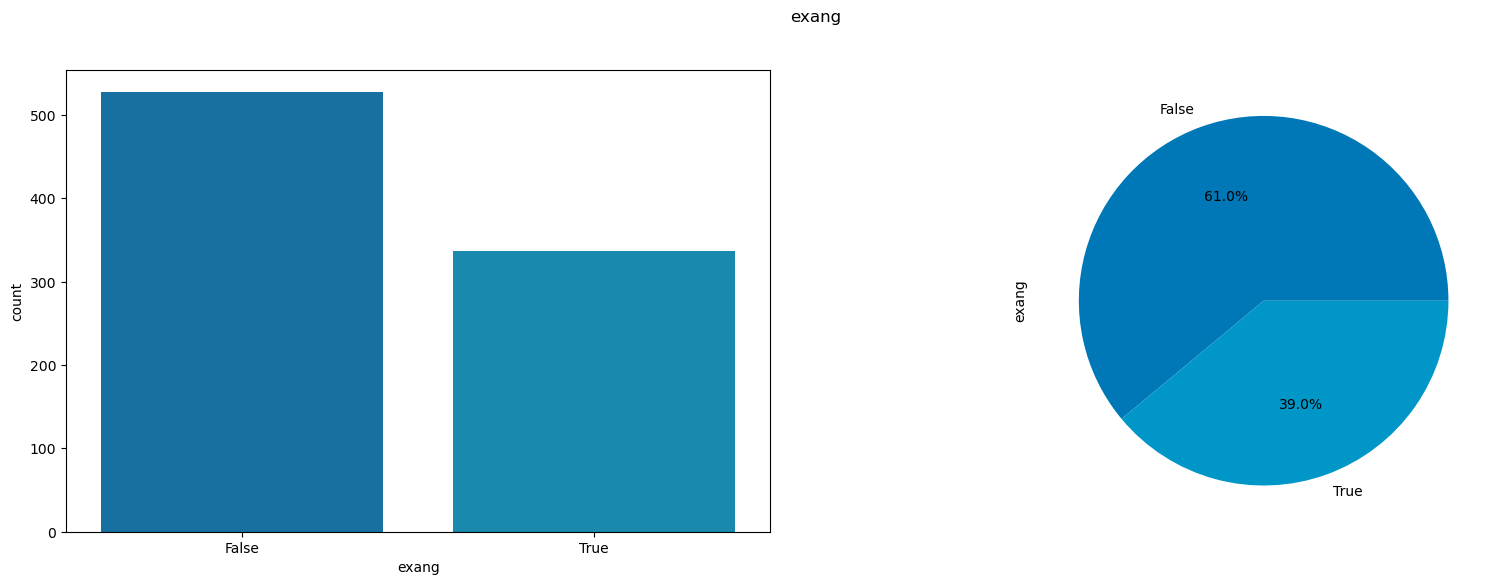

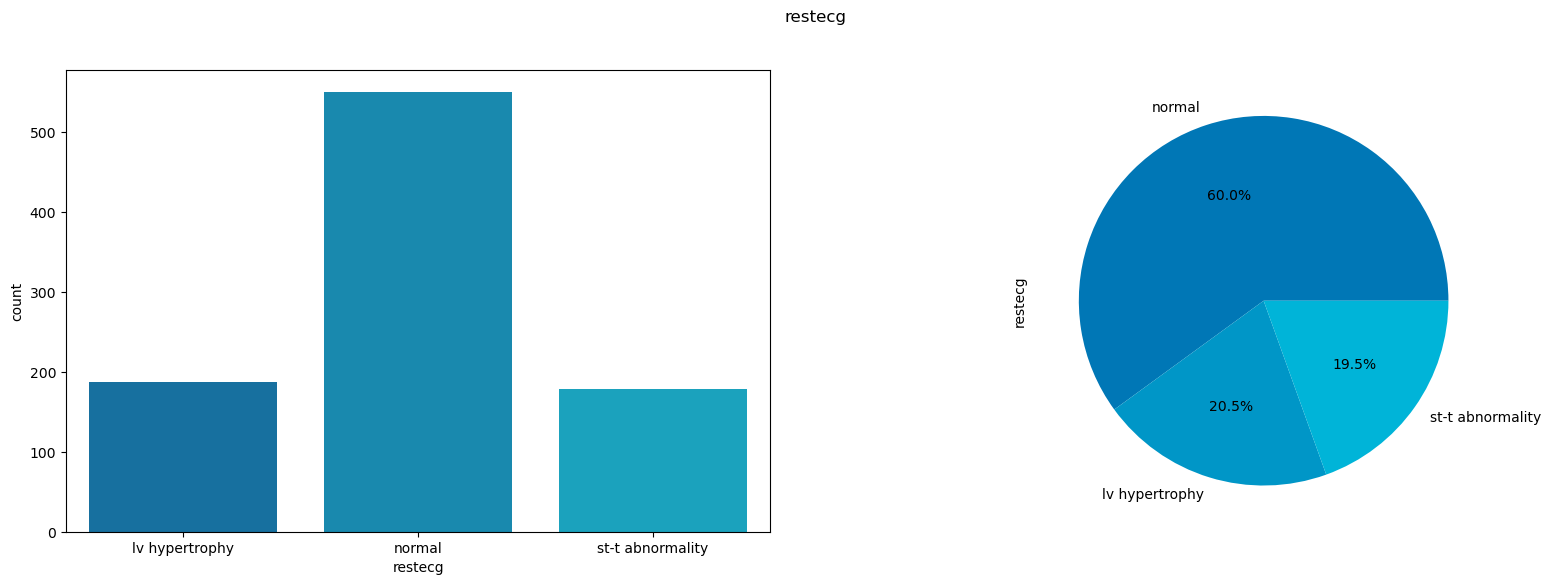

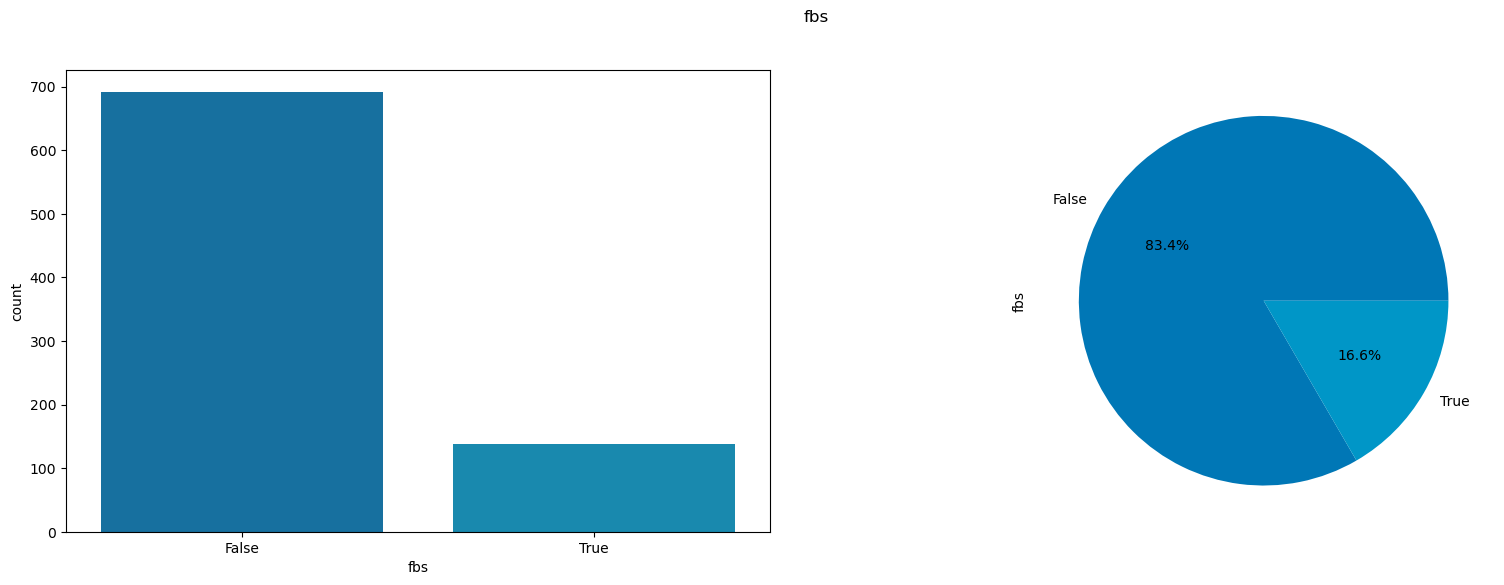

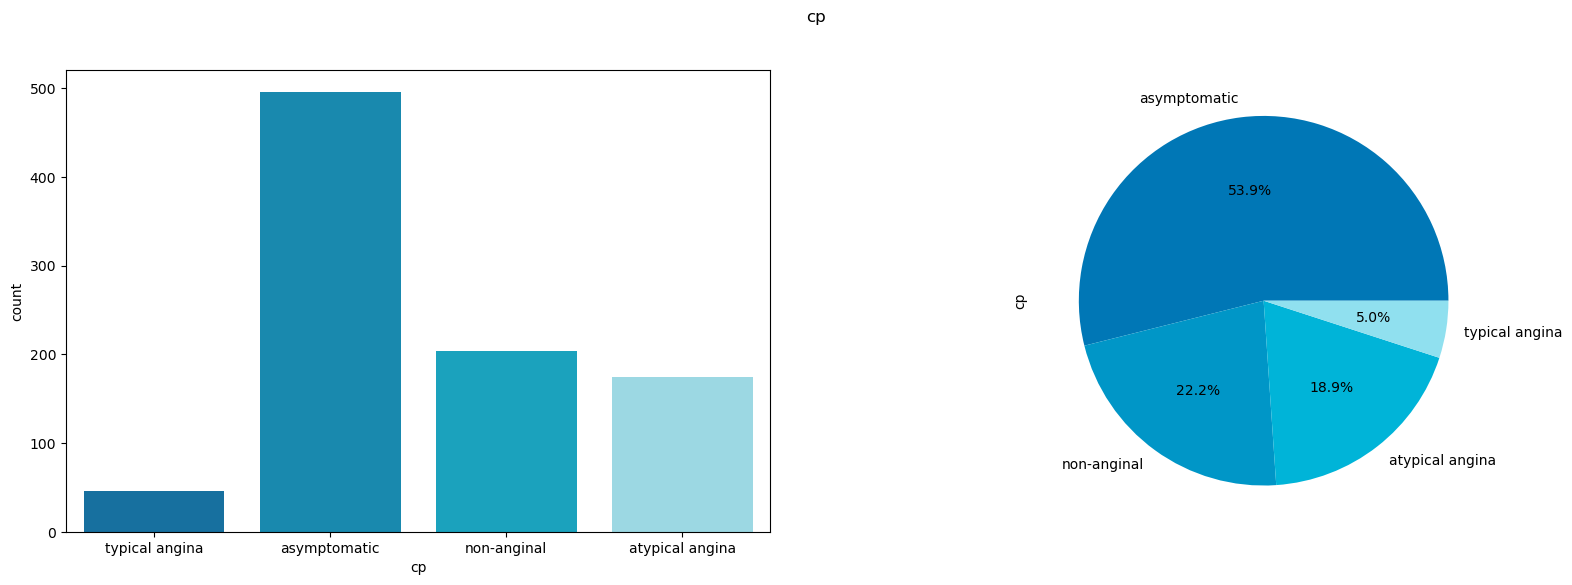

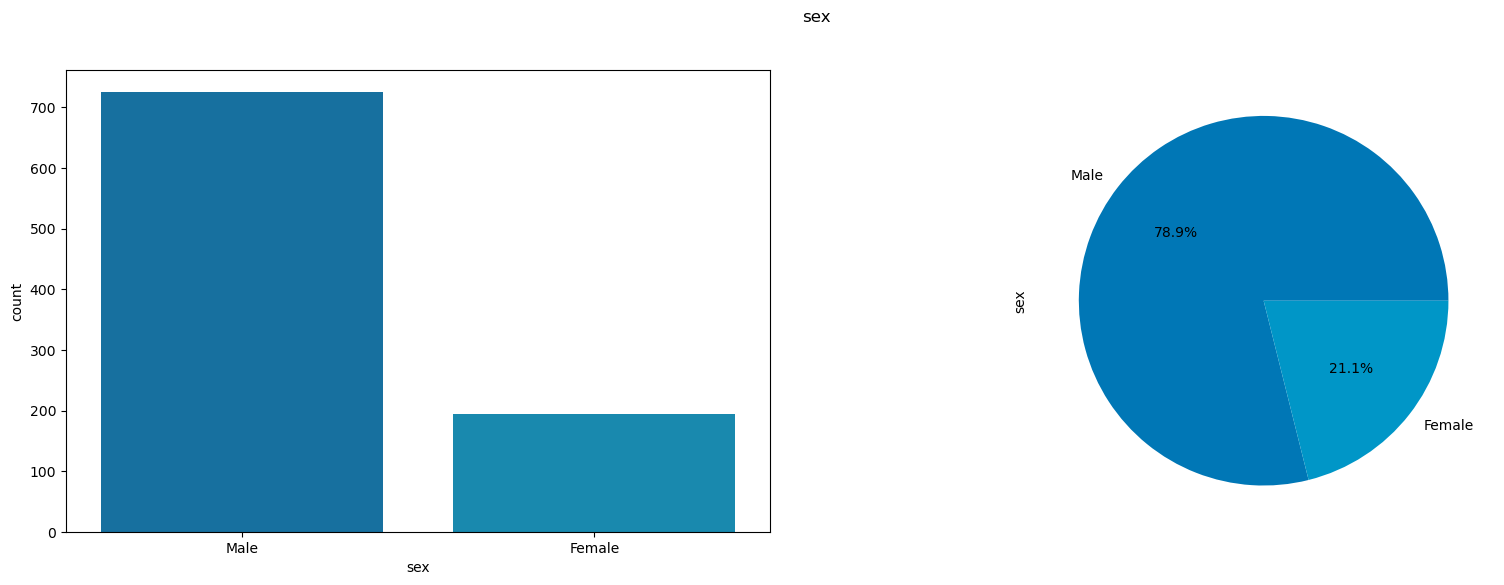

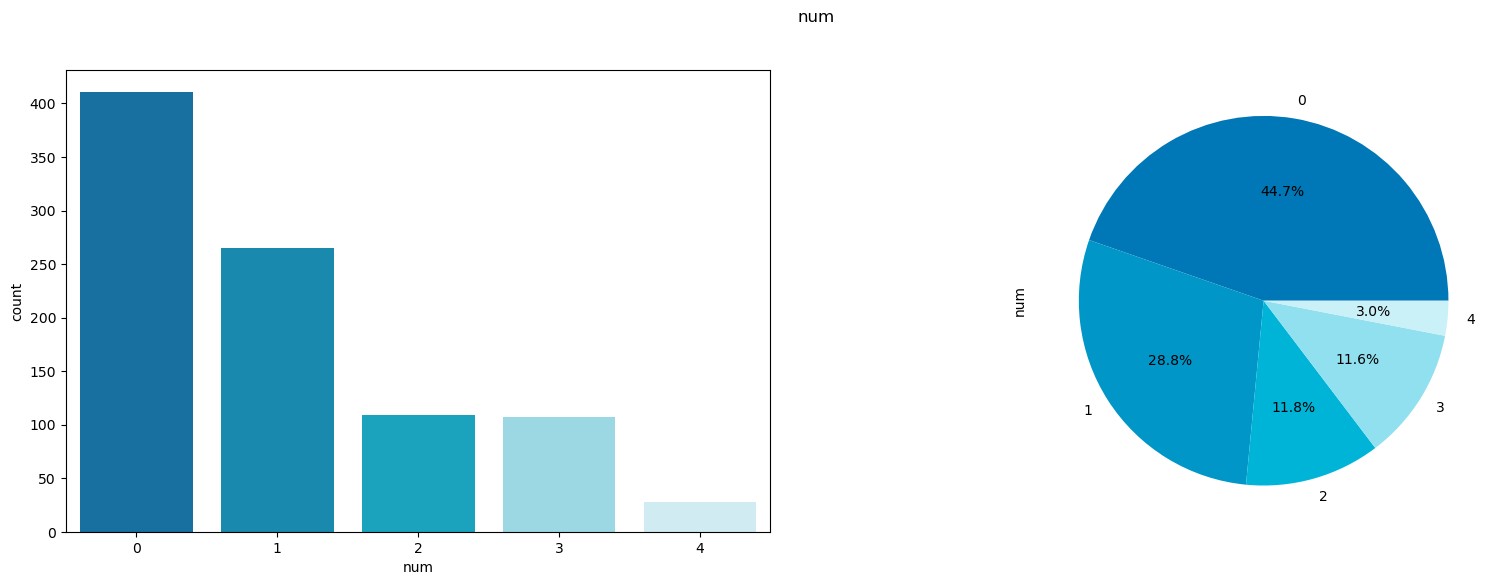

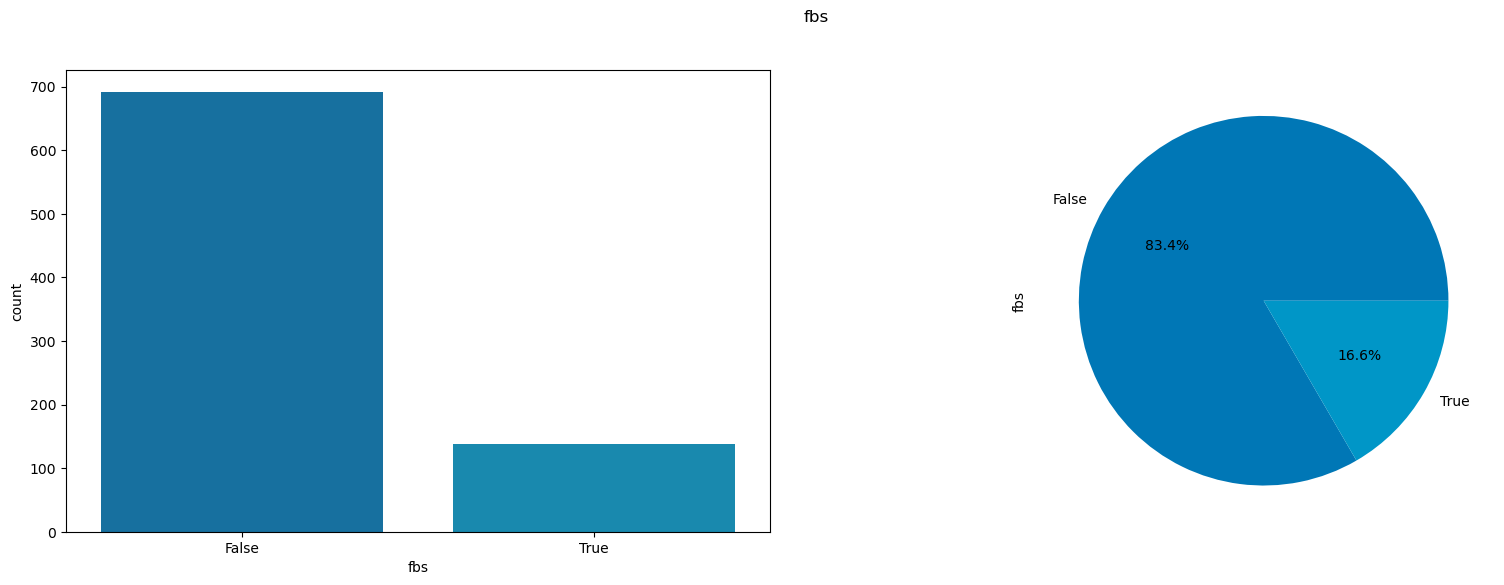

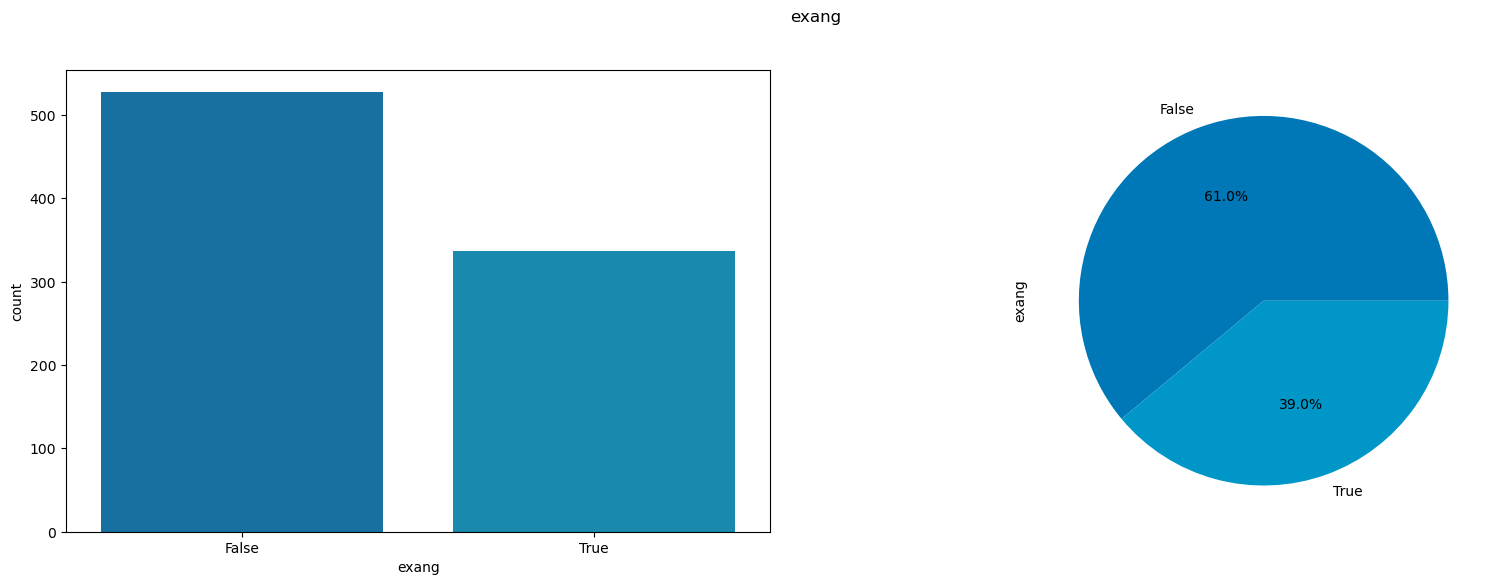

In [28]:
for column in (categorical_cols+ bool_cols):
    f,ax=plt.subplots(1,2,figsize=(20,6))
    
    data[column].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1] ,  colors= palette)
    sns.countplot(x=column,data=data,ax=ax[0] ,  palette= palette)
    
    plt.suptitle(f'{column}')
    plt.show()

- **We See :**
- The Gender :  `Male: 79% and Female: 21%`
- chest pain type : 
`asymptomatic : 57%`
`non-anginal : 22%`
`atypical angina: 19%`
`typical angina: 5%`  
- fasting blood sugar: `False : 83.4%` `True 16.6%`  
- ecg observation at resting condition : `Normal  60%` `lv hypertrophy 20%` `st-t abnormality 20%`

- exercise induced angina `True 39%` `False 61%`
- the slope of the peak exercise ST segment `flat 56.5%` `upsloping 33.2%` `Downsloping 10.3%`
- thal `Normal: 45.2%` `Fixed defect: 10.6%` `Reversible defect: 44.2%`
- num `0: 44.7%` `1: 28.8%` `2: 11.8%` `3: 11.6%` `4: 3.0%`



> ### ***5.3 Bi-variate Analysis***

<Axes: >

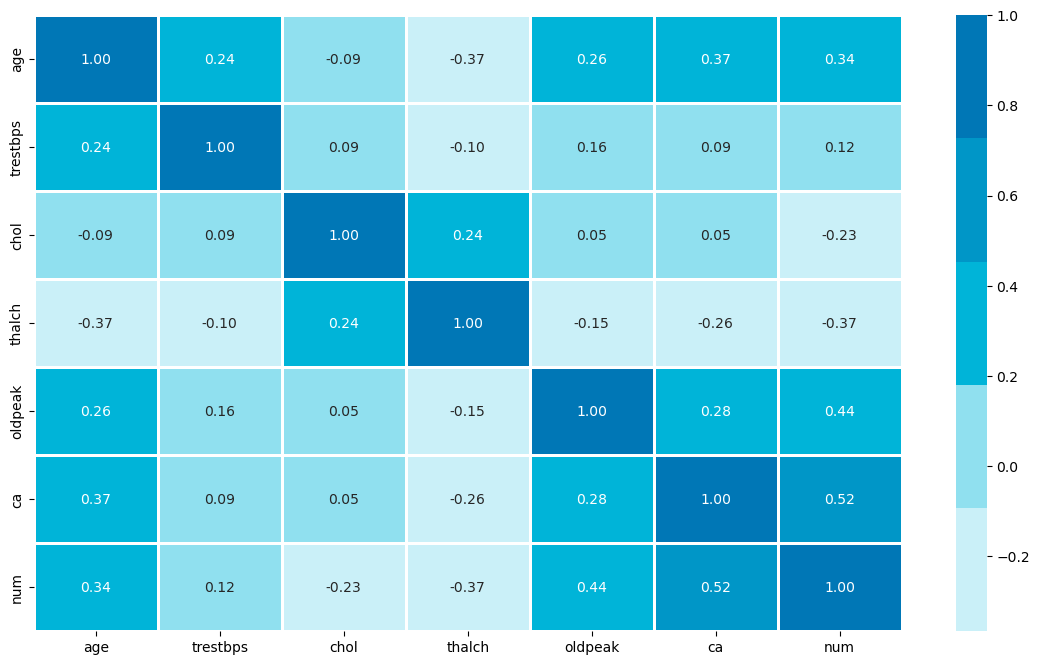

In [29]:
plt.figure(figsize= (14, 8))
sns.heatmap(data.corr(), annot = True, fmt = '.2f', linewidths= 0.8  , cmap= palette[::-1])

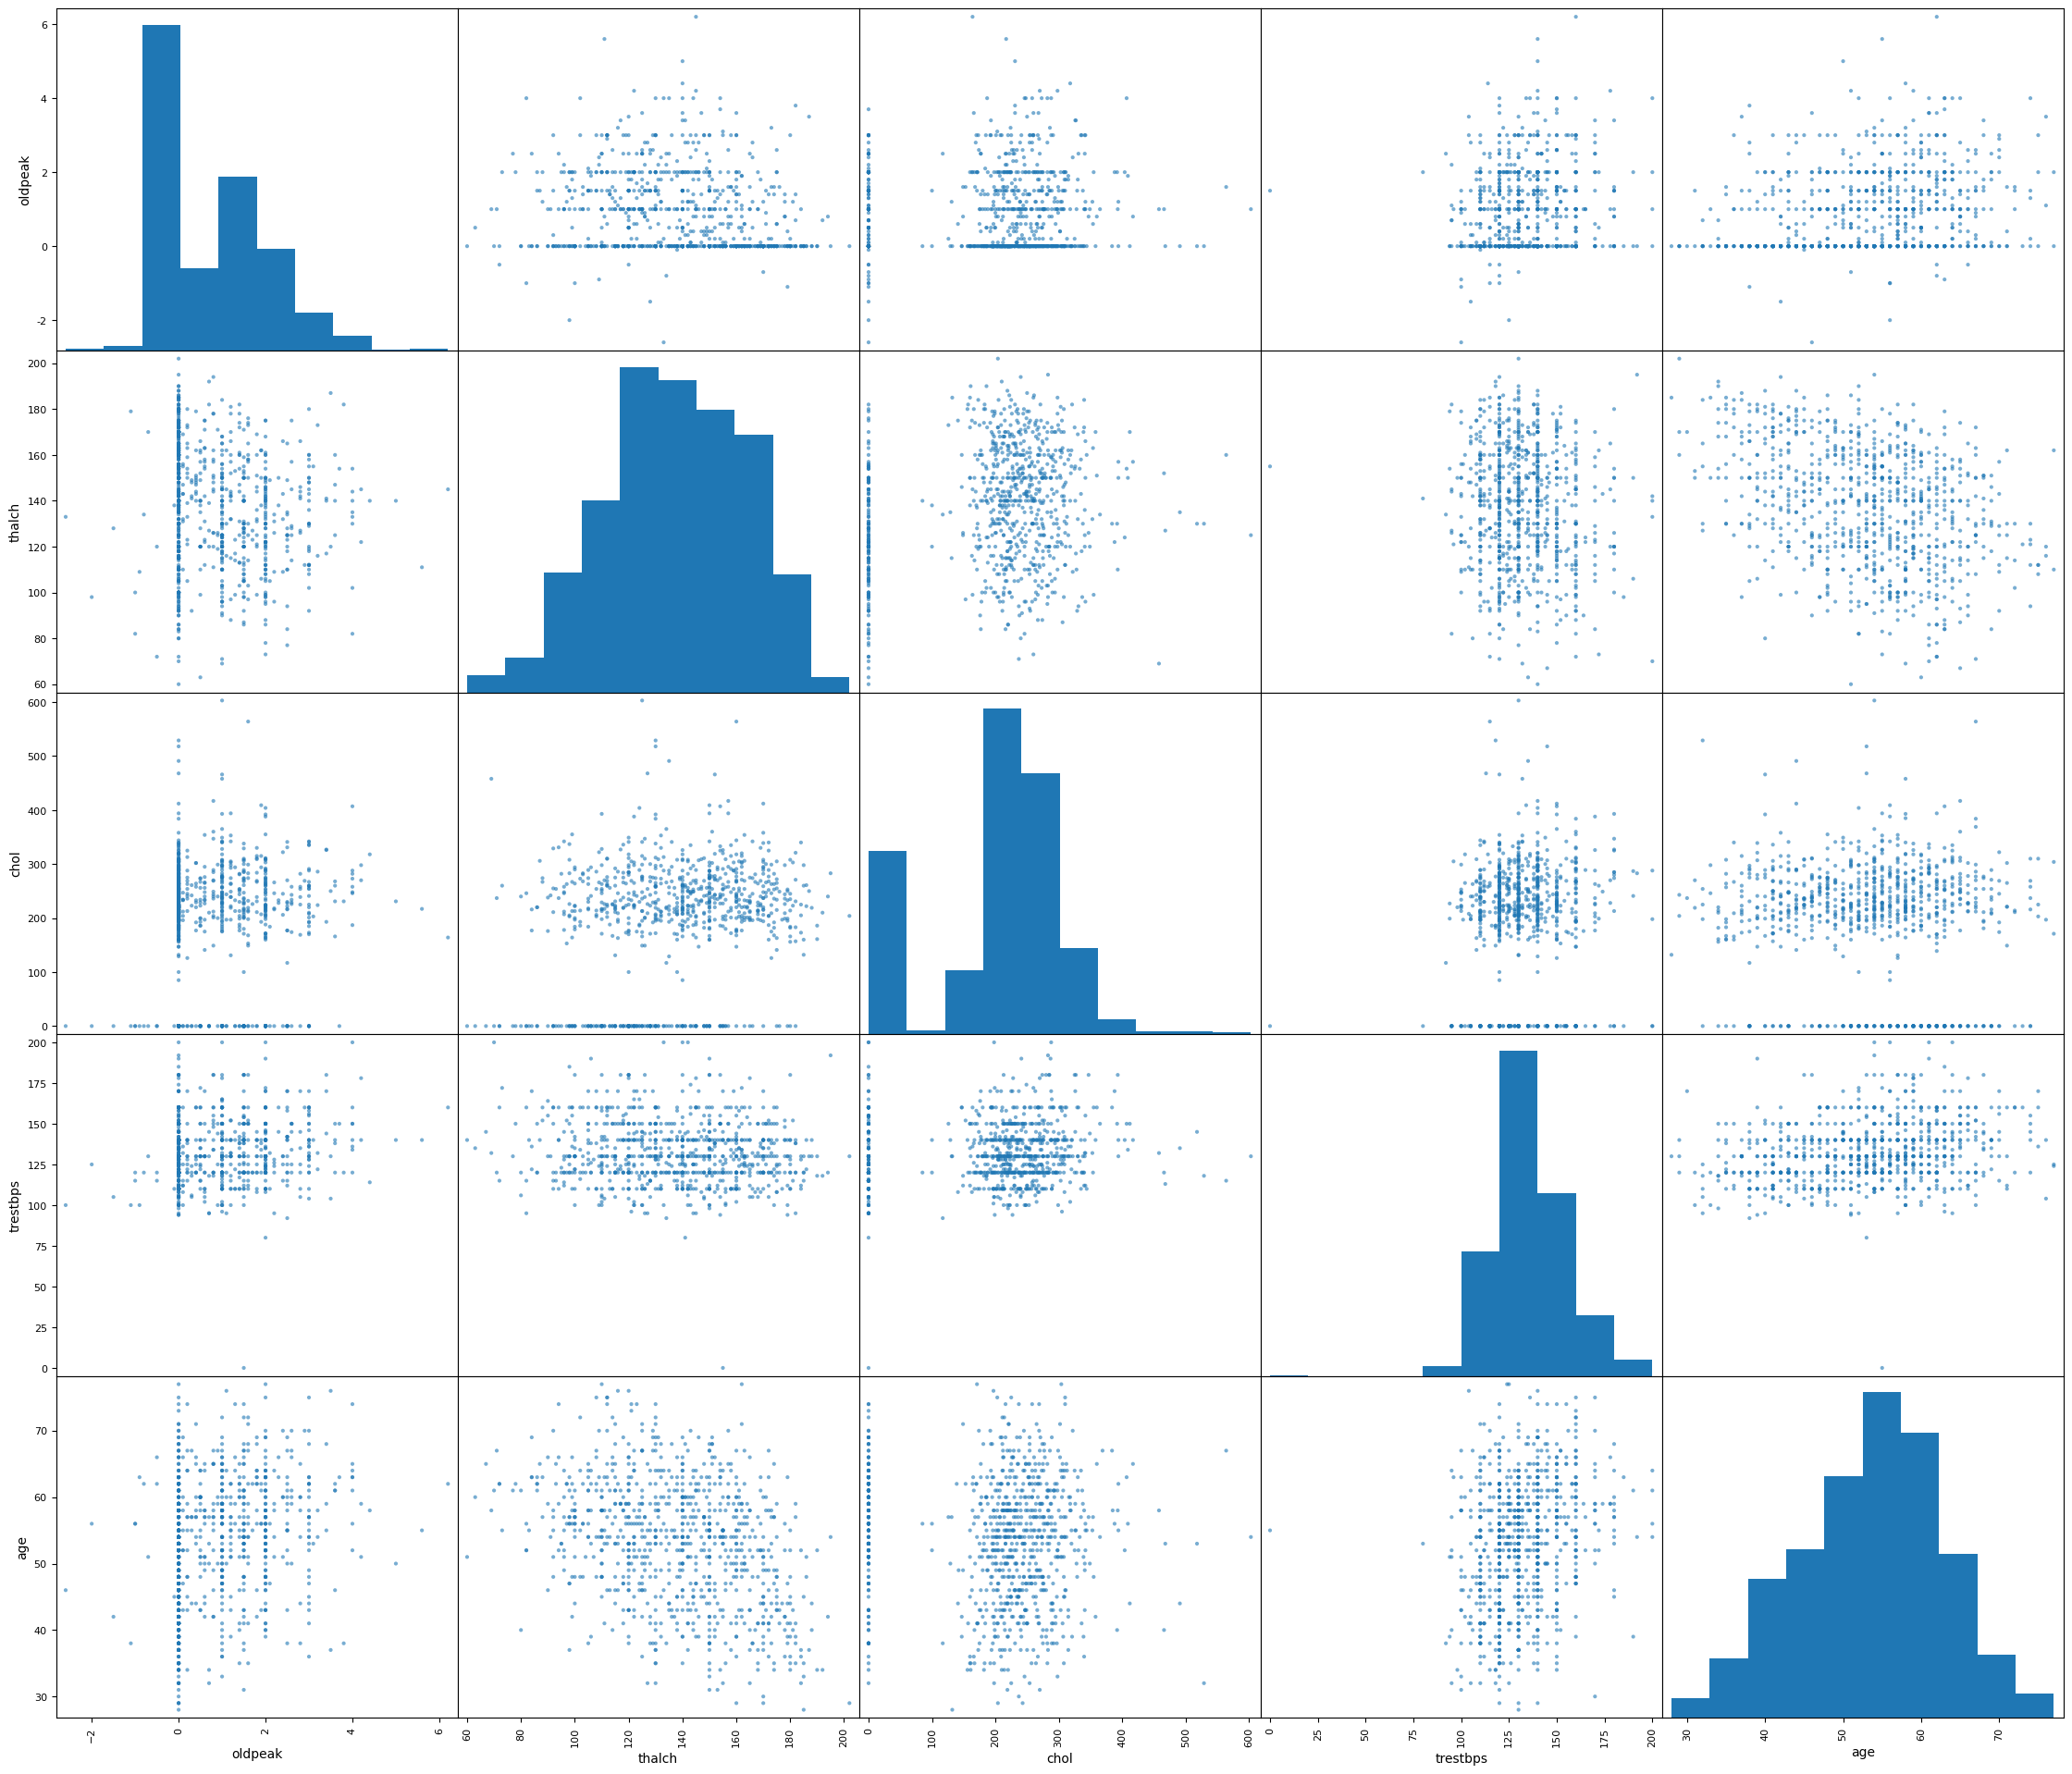

In [30]:
from pandas.plotting import scatter_matrix
scatter_matrix(data[numeric_cols], figsize=(28, 24)  ,alpha = 0.6)
plt.show()

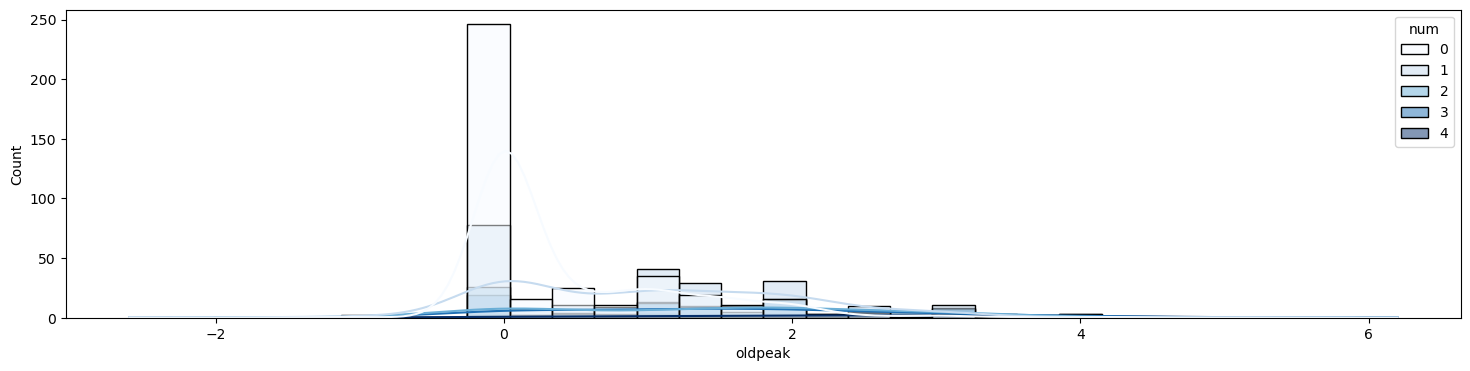

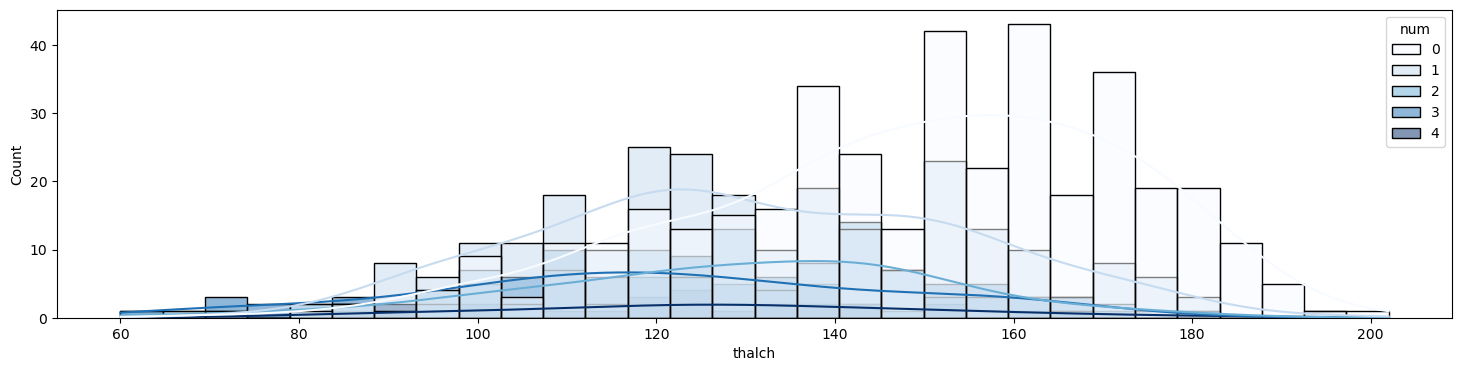

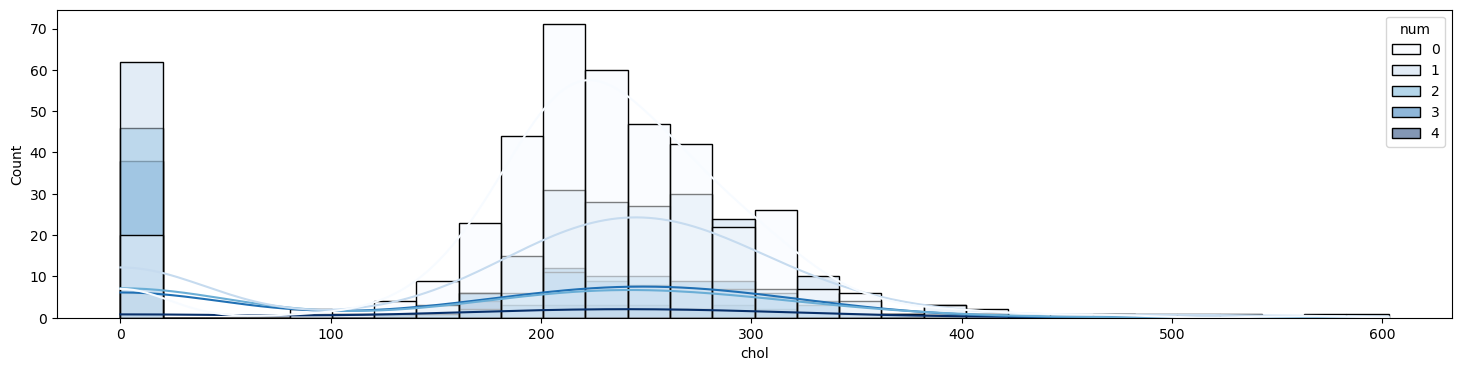

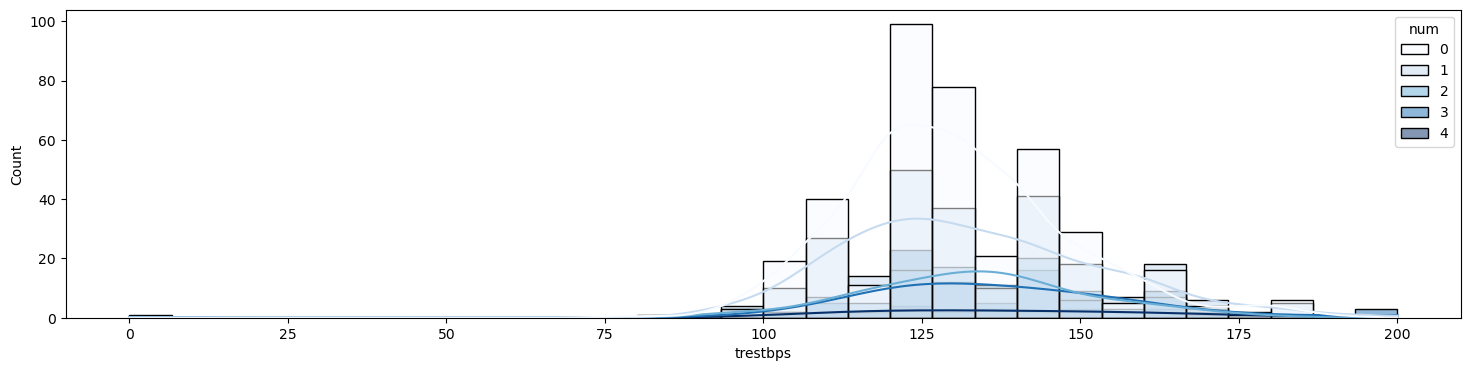

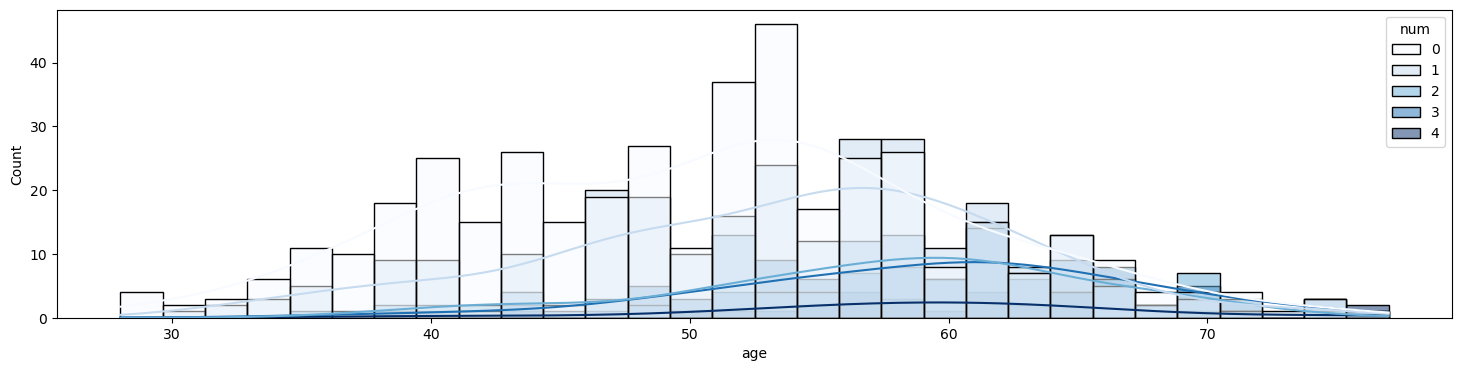

In [31]:
for column in numeric_cols:
    fig, ax = plt.subplots(figsize=(18, 4))
    fig = sns.histplot(data=data, x=column, hue="num", bins=30, kde=True  ,palette='Blues')
    plt.show()

- The minimum age to have a heart disease starts from 28 years old.
- Most of the people get heart disease at the age of 50 years.


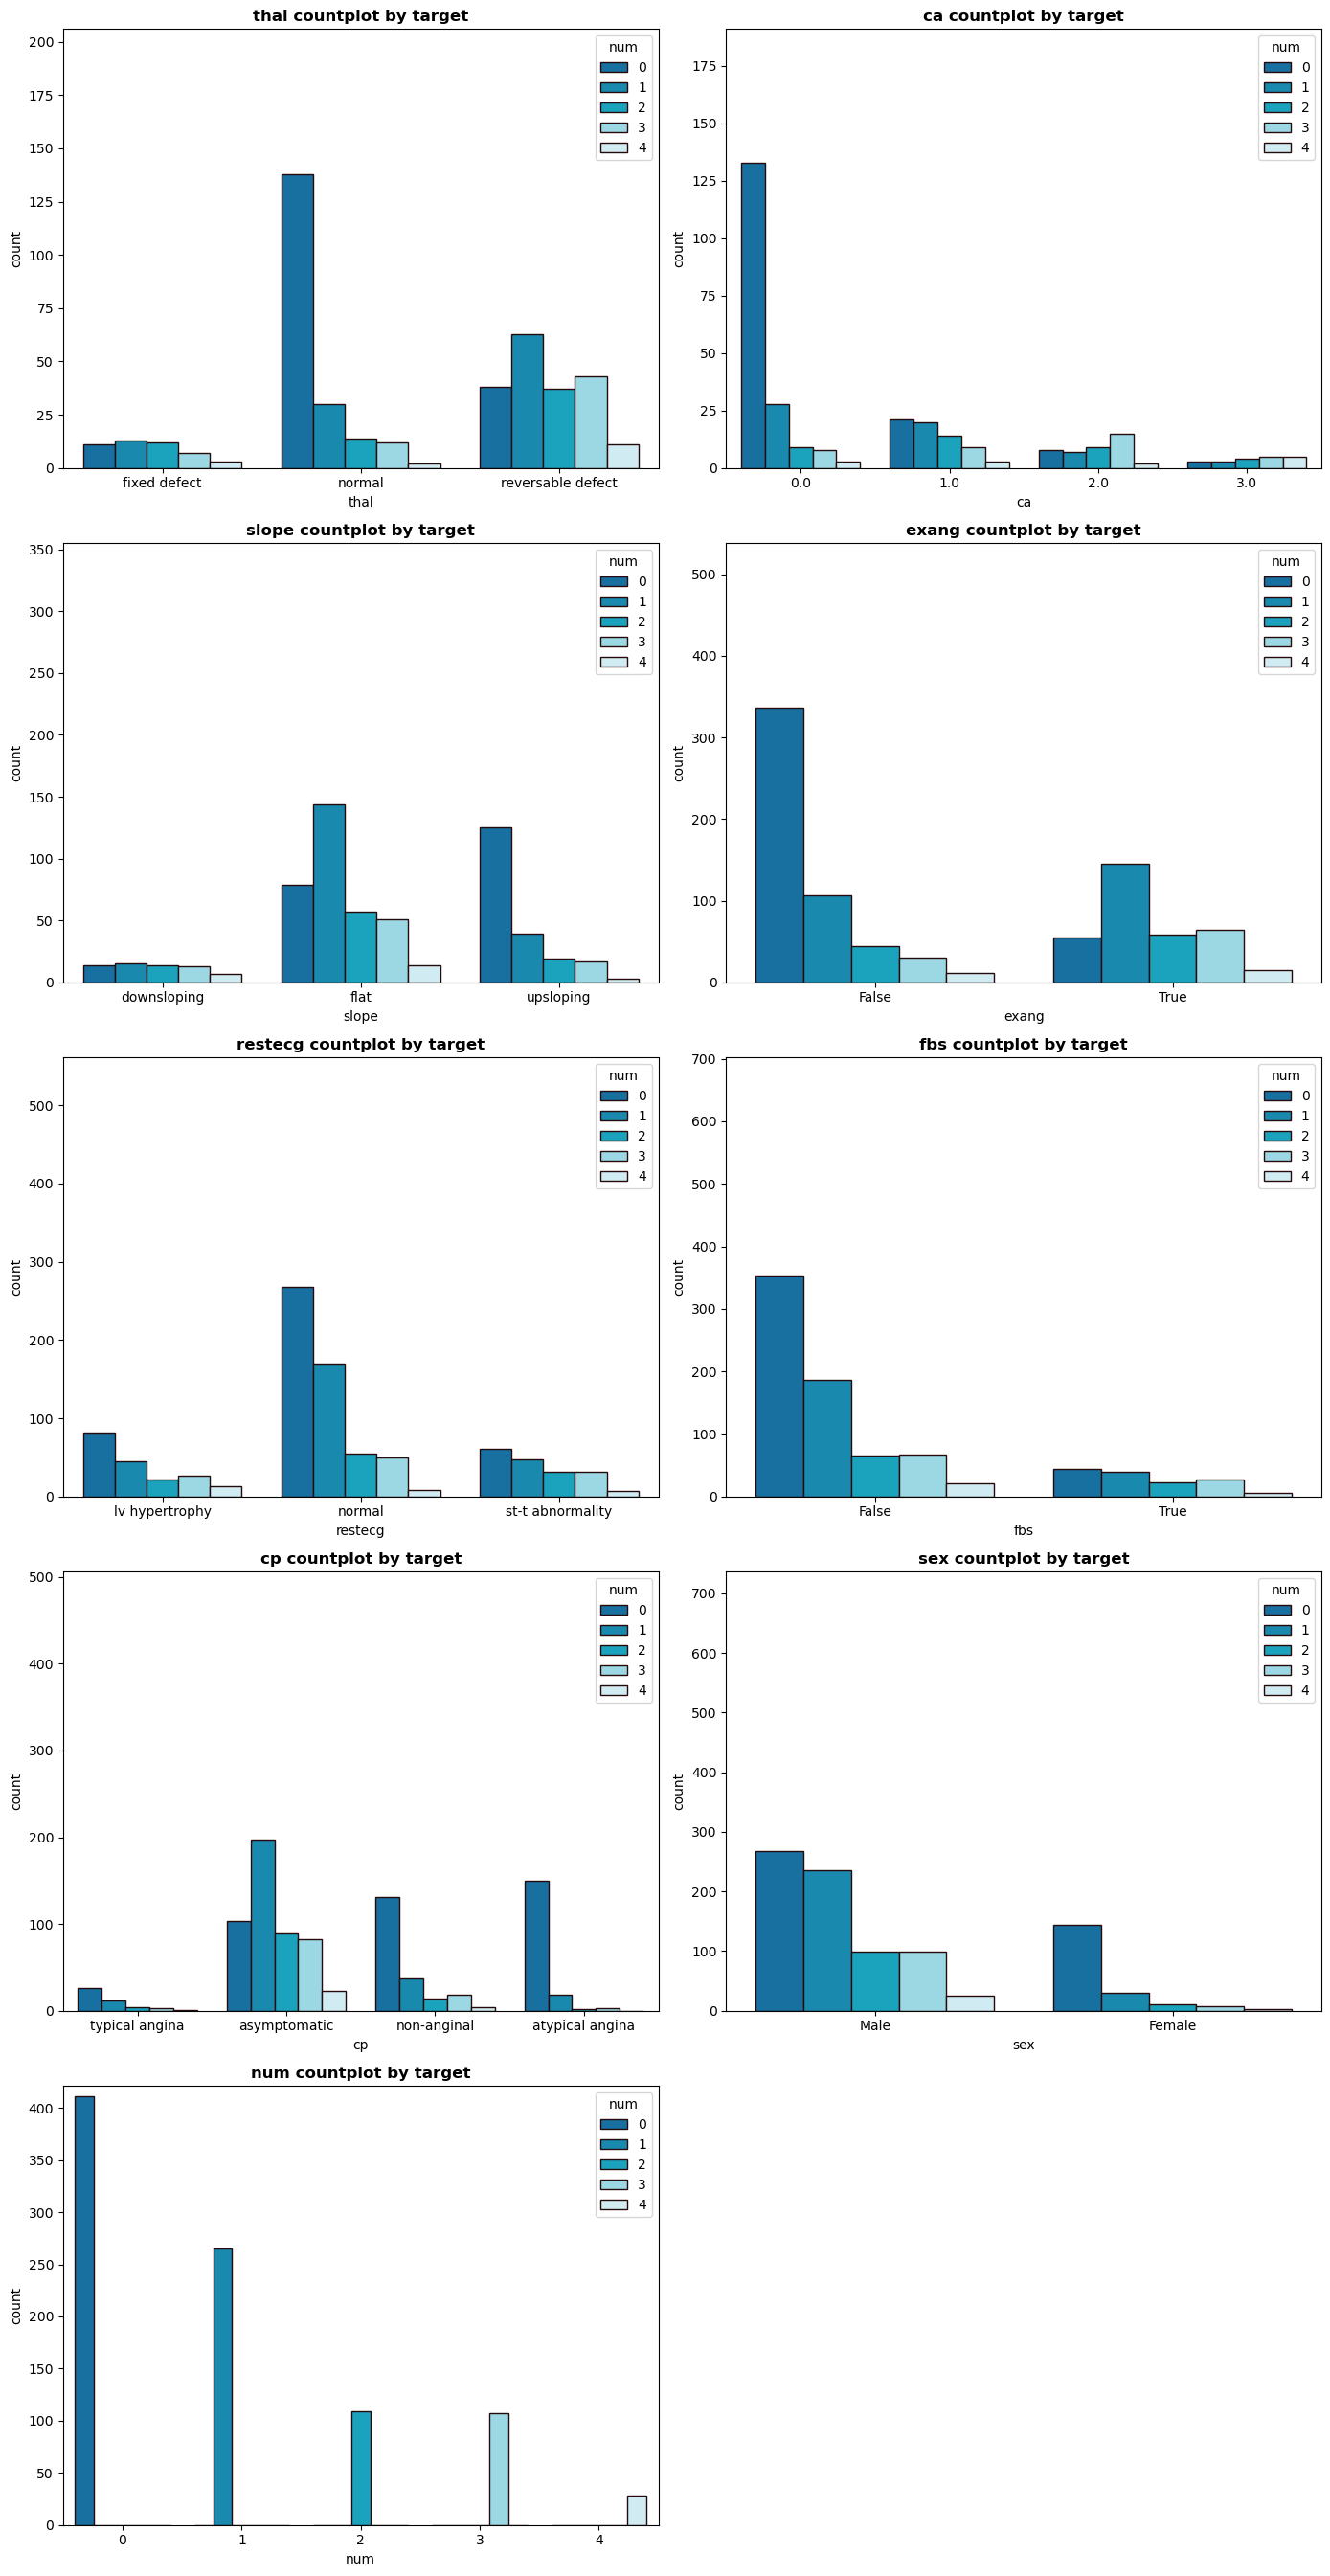

In [32]:
fig = plt.figure(figsize=(14, len(categorical_cols)*3))

for i, col in enumerate(categorical_cols):
    plt.subplot(len(categorical_cols)//2 + len(categorical_cols) % 2, 2, i+1)
    sns.countplot(x=col, hue='num', data=data, palette=palette , color='#26090b', edgecolor='#26090b')
    plt.title(f"{col} countplot by target", fontweight = 'bold')
    plt.ylim(0, data[col].value_counts().max() + 10)
    
plt.tight_layout()
plt.show()

- 

----
# ***6. Preprocess Data***
---

> ### ***6.1  Impoute Missing Values***

In [34]:
data.isna().sum()

age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [35]:
missing_data_cols = data.isnull().sum()[data.isnull().sum() > 0].index.tolist()
missing_data_cols

['trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [36]:
passed_col = 'thal'
df_null = data[data[passed_col].isnull()]
df_not_null = data[data[passed_col].notnull()]

X = df_not_null.drop(passed_col, axis=1)
y = df_not_null[passed_col]
other_missing_cols = [col for col in missing_data_cols if col != passed_col]
label_encoder = LabelEncoder()

for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        X[col] = label_encoder.fit_transform(X[col])
        
iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)


In [37]:
def impute_categorical_missing_data(passed_col):
    
    df_null = data[data[passed_col].isnull()]
    df_not_null = data[data[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)
        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):
    
    df_null = data[data[passed_col].isnull()]
    df_not_null = data[data[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

In [38]:
missing_data_cols = data.isnull().sum()[data.isnull().sum() > 0].index.tolist()

for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((data[col].isnull().sum() / len(data)) * 100, 2))+"%")
    if col in categorical_cols:
        data[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        data[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing Values trestbps : 6.41%
MAE = 13.546416184971099 

RMSE = 17.258793636968612 

R2 = 0.06996633546822628 

Missing Values chol : 3.26%
MAE = 64.37668539325843 

RMSE = 86.40289353183815 

R2 = 0.40860830826352 

Missing Values fbs : 9.78%
The feature 'fbs' has been imputed with 79.52 accuracy

Missing Values restecg : 0.22%
The feature 'restecg' has been imputed with 60.87 accuracy

Missing Values thalch : 5.98%
MAE = 17.24791907514451 

RMSE = 22.01316094778973 

R2 = 0.2953813542336424 

Missing Values exang : 5.98%
The feature 'exang' has been imputed with 78.03 accuracy

Missing Values oldpeak : 6.74%
MAE = 0.5754069767441861 

RMSE = 0.8068927409196573 

R2 = 0.3797174514140007 

Missing Values slope : 33.59%
The feature 'slope' has been imputed with 69.11 accuracy

Missing Values ca : 66.41%
The feature 'ca' has been imputed with 66.13 accuracy

Missing Values thal : 52.83%
The feature 'thal' has been imputed with 66.67 accuracy



In [39]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [40]:
# Make It Binary Classification 
# data.loc[data['num'] >= 1, 'num'] = 1

In [41]:
data

age     sex               cp  trestbps   chol    fbs           restecg  \
0     63    Male   typical angina    145.00  233.0   True    lv hypertrophy   
1     67    Male     asymptomatic    160.00  286.0  False    lv hypertrophy   
2     67    Male     asymptomatic    120.00  229.0  False    lv hypertrophy   
3     37    Male      non-anginal    130.00  250.0  False            normal   
4     41  Female  atypical angina    130.00  204.0  False    lv hypertrophy   
..   ...     ...              ...       ...    ...    ...               ...   
915   54  Female     asymptomatic    127.00  333.0   True  st-t abnormality   
916   62    Male   typical angina    136.19  139.0  False  st-t abnormality   
917   55    Male     asymptomatic    122.00  223.0   True  st-t abnormality   
918   58    Male     asymptomatic    143.30  385.0   True    lv hypertrophy   
919   62    Male  atypical angina    120.00  254.0  False    lv hypertrophy   

     thalch  exang  oldpeak        slope   ca               thal  num  
0    150.00  False    2.300  downsloping  0.0       fixed defect    0  
1    108.00   True    1.500         flat  3.0             normal    2  
2    129.00   True    2.600         flat  2.0  reversable defect    1  
3    187.00  False    3.500  downsloping  0.0             normal    0  
4    172.00  False    1.400    upsloping  0.0             normal    0  
..      ...    ...      ...          ...  ...                ...  ...  
915  154.00  False    0.000    upsloping  0.0             normal    1  
916  144.17  False    1.922         flat  0.0  reversable defect    0  
917  100.00  False    0.000         flat  1.0       fixed defect    2  
918  145.90   True    2.344         flat  0.0  reversable defect    0  
919   93.00   True    0.000         flat  1.0  reversable defect    1  

[920 rows x 14 columns]

In [42]:
def getFeats(df):

    
    return df

# getFeats(data)

In [43]:
categorical_cols.remove('num')
categorical_cols 

['thal', 'ca', 'slope', 'exang', 'restecg', 'fbs', 'cp', 'sex']

In [44]:
numeric_cols

['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

> ### ***6.2 Build a Pipelines***

In [45]:
# data.dropna(inplace=True)

In [46]:
data

age     sex               cp  trestbps   chol    fbs           restecg  \
0     63    Male   typical angina    145.00  233.0   True    lv hypertrophy   
1     67    Male     asymptomatic    160.00  286.0  False    lv hypertrophy   
2     67    Male     asymptomatic    120.00  229.0  False    lv hypertrophy   
3     37    Male      non-anginal    130.00  250.0  False            normal   
4     41  Female  atypical angina    130.00  204.0  False    lv hypertrophy   
..   ...     ...              ...       ...    ...    ...               ...   
915   54  Female     asymptomatic    127.00  333.0   True  st-t abnormality   
916   62    Male   typical angina    136.19  139.0  False  st-t abnormality   
917   55    Male     asymptomatic    122.00  223.0   True  st-t abnormality   
918   58    Male     asymptomatic    143.30  385.0   True    lv hypertrophy   
919   62    Male  atypical angina    120.00  254.0  False    lv hypertrophy   

     thalch  exang  oldpeak        slope   ca               thal  num  
0    150.00  False    2.300  downsloping  0.0       fixed defect    0  
1    108.00   True    1.500         flat  3.0             normal    2  
2    129.00   True    2.600         flat  2.0  reversable defect    1  
3    187.00  False    3.500  downsloping  0.0             normal    0  
4    172.00  False    1.400    upsloping  0.0             normal    0  
..      ...    ...      ...          ...  ...                ...  ...  
915  154.00  False    0.000    upsloping  0.0             normal    1  
916  144.17  False    1.922         flat  0.0  reversable defect    0  
917  100.00  False    0.000         flat  1.0       fixed defect    2  
918  145.90   True    2.344         flat  0.0  reversable defect    0  
919   93.00   True    0.000         flat  1.0  reversable defect    1  

[920 rows x 14 columns]

In [47]:

from sklearn.preprocessing import OrdinalEncoder


In [48]:

# getFeats_transformer = FunctionTransformer(getFeats)


cat_pipline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot',OneHotEncoder())
])

num_pipline = Pipeline(steps=[
    ('imputer', KNNImputer()),
    ('scaler', StandardScaler())
])


preprocessor = ColumnTransformer(
    transformers=[
        ('cat', cat_pipline, categorical_cols),
        ('num', num_pipline, numeric_cols),
    ])


# Apply the full pipeline to the data
preprocessor

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot', OneHotEncoder())]),
                                 ['thal', 'ca', 'slope', 'exang', 'restecg',
                                  'fbs', 'cp', 'sex']),
                                ('num',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['oldpeak', 'thalch', 'chol', 'trestbps',
                                  'age'])])

In [49]:
X = data.drop(columns='num')
y = data.num

> ### ***6.3 Split Data***

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=42)

In [51]:
X_train

age     sex               cp  trestbps    chol    fbs           restecg  \
880   62    Male     asymptomatic    140.90  170.00  False  st-t abnormality   
457   54    Male      non-anginal    150.00  197.02  False            normal   
797   51    Male      non-anginal    133.98  339.00  False            normal   
25    50  Female      non-anginal    120.00  219.00  False            normal   
84    52    Male  atypical angina    120.00  325.00  False            normal   
..   ...     ...              ...       ...     ...    ...               ...   
106   59    Male     asymptomatic    140.00  177.00  False            normal   
270   61    Male     asymptomatic    140.00  207.00  False    lv hypertrophy   
860   75    Male     asymptomatic    160.00  310.00   True            normal   
435   53  Female  atypical angina    140.00  216.00  False            normal   
102   57  Female     asymptomatic    128.00  303.00  False    lv hypertrophy   

     thalch  exang  oldpeak        slope   ca               thal  
880  120.00   True     3.00  downsloping  0.0  reversable defect  
457  122.00  False     0.00    upsloping  0.0  reversable defect  
797  139.85   True     3.43         flat  0.0  reversable defect  
25   158.00  False     1.60         flat  0.0             normal  
84   172.00  False     0.20    upsloping  0.0             normal  
..      ...    ...      ...          ...  ...                ...  
106  162.00   True     0.00    upsloping  1.0  reversable defect  
270  138.00   True     1.90    upsloping  1.0  reversable defect  
860  112.00   True     2.00  downsloping  0.0  reversable defect  
435  142.00   True     2.00         flat  0.0             normal  
102  159.00  False     0.00    upsloping  1.0             normal  

[736 rows x 13 columns]

In [52]:
X_train_pre = preprocessor.fit_transform(X_train)
X_test_pre = preprocessor.transform(X_test)

column_names = preprocessor.get_feature_names_out()

X_train_pre = pd.DataFrame(X_train_pre, columns=column_names)
X_test_pre = pd.DataFrame(X_test_pre, columns=column_names)


In [53]:
X_train_pre

cat__thal_fixed defect  cat__thal_normal  cat__thal_reversable defect  \
0                       0.0               0.0                          1.0   
1                       0.0               0.0                          1.0   
2                       0.0               0.0                          1.0   
3                       0.0               1.0                          0.0   
4                       0.0               1.0                          0.0   
..                      ...               ...                          ...   
731                     0.0               0.0                          1.0   
732                     0.0               0.0                          1.0   
733                     0.0               0.0                          1.0   
734                     0.0               1.0                          0.0   
735                     0.0               1.0                          0.0   

     cat__ca_0.0  cat__ca_1.0  cat__ca_2.0  cat__ca_3.0  \
0            1.0          0.0          0.0          0.0   
1            1.0          0.0          0.0          0.0   
2            1.0          0.0          0.0          0.0   
3            1.0          0.0          0.0          0.0   
4            1.0          0.0          0.0          0.0   
..           ...          ...          ...          ...   
731          0.0          1.0          0.0          0.0   
732          0.0          1.0          0.0          0.0   
733          1.0          0.0          0.0          0.0   
734          1.0          0.0          0.0          0.0   
735          0.0          1.0          0.0          0.0   

     cat__slope_downsloping  cat__slope_flat  cat__slope_upsloping  ...  \
0                       1.0              0.0                   0.0  ...   
1                       0.0              0.0                   1.0  ...   
2                       0.0              1.0                   0.0  ...   
3                       0.0              1.0                   0.0  ...   
4                       0.0              0.0                   1.0  ...   
..                      ...              ...                   ...  ...   
731                     0.0              0.0                   1.0  ...   
732                     0.0              0.0                   1.0  ...   
733                     1.0              0.0                   0.0  ...   
734                     0.0              1.0                   0.0  ...   
735                     0.0              0.0                   1.0  ...   

     cat__cp_atypical angina  cat__cp_non-anginal  cat__cp_typical angina  \
0                        0.0                  0.0                     0.0   
1                        0.0                  1.0                     0.0   
2                        0.0                  1.0                     0.0   
3                        0.0                  1.0                     0.0   
4                        1.0                  0.0                     0.0   
..                       ...                  ...                     ...   
731                      0.0                  0.0                     0.0   
732                      0.0                  0.0                     0.0   
733                      0.0                  0.0                     0.0   
734                      1.0                  0.0                     0.0   
735                      0.0                  0.0                     0.0   

     cat__sex_Female  cat__sex_Male  num__oldpeak  num__thalch  num__chol  \
0                0.0            1.0      1.800624    -0.678090  -0.258464   
1                0.0            1.0     -0.848833    -0.599438  -0.010689   
2                0.0            1.0      2.180379     0.102530   1.291280   
3                1.0            0.0      0.564211     0.816296   0.190870   
4                0.0            1.0     -0.672203     1.366859   1.162899   
..               ...            ...           ...          ...        .


---
# ***7. Model Building***
---


 > ### ***7.1 Decision Tree Classifier***

In [54]:
dt = DecisionTreeClassifier(max_depth=20, random_state=42)
dt.fit(X_train_pre, y_train)

# predict the test data
y_pred_dt = dt.predict(X_test_pre)

 > ### ***7.2 Xgboost Classifier***

In [55]:
# train the xgboost model
xgb = XGBClassifier(n_estimators=100, random_state=42)
xgb.fit(X_train_pre, y_train)

# predict the test data
y_pred_xgb = xgb.predict(X_test_pre)


 > ### ***7.3 Catboost Classifier***

In [56]:

catboost = CatBoostClassifier(iterations=1000, random_state=42 )
catboost.fit(X_train_pre, y_train)

y_pred_catboost = catboost.predict(X_test_pre)


Learning rate set to 0.077899
0:	learn: 1.5244233	total: 50.1ms	remaining: 50s
1:	learn: 1.4431007	total: 53.4ms	remaining: 26.6s
2:	learn: 1.3869289	total: 56.6ms	remaining: 18.8s
3:	learn: 1.3456353	total: 59.9ms	remaining: 14.9s
4:	learn: 1.2941315	total: 63.3ms	remaining: 12.6s
5:	learn: 1.2529685	total: 66.3ms	remaining: 11s
6:	learn: 1.2148784	total: 69.4ms	remaining: 9.84s
7:	learn: 1.1782165	total: 71.4ms	remaining: 8.85s
8:	learn: 1.1499007	total: 74.4ms	remaining: 8.2s
9:	learn: 1.1247040	total: 77.6ms	remaining: 7.68s
10:	learn: 1.1018350	total: 80.9ms	remaining: 7.27s
11:	learn: 1.0769216	total: 84.1ms	remaining: 6.92s
12:	learn: 1.0551411	total: 87.3ms	remaining: 6.62s
13:	learn: 1.0352106	total: 90.4ms	remaining: 6.37s
14:	learn: 1.0178081	total: 93.3ms	remaining: 6.12s
15:	learn: 1.0014858	total: 96.4ms	remaining: 5.93s
16:	learn: 0.9853475	total: 99.5ms	remaining: 5.75s
17:	learn: 0.9700253	total: 103ms	remaining: 5.59s
18:	learn: 0.9558138	total: 106ms	remaining: 5.45s

167:	learn: 0.4508681	total: 594ms	remaining: 2.94s
168:	learn: 0.4490441	total: 598ms	remaining: 2.94s
169:	learn: 0.4473128	total: 601ms	remaining: 2.94s
170:	learn: 0.4457727	total: 605ms	remaining: 2.93s
171:	learn: 0.4448438	total: 608ms	remaining: 2.93s
172:	learn: 0.4426391	total: 612ms	remaining: 2.92s
173:	learn: 0.4419733	total: 616ms	remaining: 2.92s
174:	learn: 0.4409594	total: 620ms	remaining: 2.92s
175:	learn: 0.4385422	total: 624ms	remaining: 2.92s
176:	learn: 0.4363077	total: 627ms	remaining: 2.91s
177:	learn: 0.4350485	total: 630ms	remaining: 2.91s
178:	learn: 0.4338297	total: 633ms	remaining: 2.9s
179:	learn: 0.4325595	total: 637ms	remaining: 2.9s
180:	learn: 0.4308725	total: 640ms	remaining: 2.9s
181:	learn: 0.4292005	total: 644ms	remaining: 2.89s
182:	learn: 0.4280105	total: 647ms	remaining: 2.89s
183:	learn: 0.4269439	total: 650ms	remaining: 2.88s
184:	learn: 0.4247244	total: 653ms	remaining: 2.88s
185:	learn: 0.4240033	total: 656ms	remaining: 2.87s
186:	learn: 0.4

349:	learn: 0.2667133	total: 1.19s	remaining: 2.21s
350:	learn: 0.2659865	total: 1.19s	remaining: 2.2s
351:	learn: 0.2651776	total: 1.2s	remaining: 2.2s
352:	learn: 0.2646510	total: 1.2s	remaining: 2.2s
353:	learn: 0.2638902	total: 1.2s	remaining: 2.2s
354:	learn: 0.2635404	total: 1.21s	remaining: 2.19s
355:	learn: 0.2630416	total: 1.21s	remaining: 2.19s
356:	learn: 0.2615162	total: 1.22s	remaining: 2.19s
357:	learn: 0.2609452	total: 1.22s	remaining: 2.19s
358:	learn: 0.2599500	total: 1.22s	remaining: 2.18s
359:	learn: 0.2592151	total: 1.23s	remaining: 2.18s
360:	learn: 0.2586064	total: 1.23s	remaining: 2.18s
361:	learn: 0.2581889	total: 1.23s	remaining: 2.17s
362:	learn: 0.2573718	total: 1.24s	remaining: 2.17s
363:	learn: 0.2569843	total: 1.24s	remaining: 2.16s
364:	learn: 0.2558709	total: 1.24s	remaining: 2.16s
365:	learn: 0.2553118	total: 1.25s	remaining: 2.16s
366:	learn: 0.2544020	total: 1.25s	remaining: 2.15s
367:	learn: 0.2533386	total: 1.25s	remaining: 2.15s
368:	learn: 0.25287

531:	learn: 0.1722105	total: 1.78s	remaining: 1.56s
532:	learn: 0.1718767	total: 1.78s	remaining: 1.56s
533:	learn: 0.1714089	total: 1.78s	remaining: 1.56s
534:	learn: 0.1710629	total: 1.79s	remaining: 1.55s
535:	learn: 0.1704676	total: 1.79s	remaining: 1.55s
536:	learn: 0.1701163	total: 1.79s	remaining: 1.55s
537:	learn: 0.1699738	total: 1.8s	remaining: 1.54s
538:	learn: 0.1695345	total: 1.8s	remaining: 1.54s
539:	learn: 0.1694103	total: 1.8s	remaining: 1.54s
540:	learn: 0.1691742	total: 1.81s	remaining: 1.53s
541:	learn: 0.1687308	total: 1.81s	remaining: 1.53s
542:	learn: 0.1682244	total: 1.81s	remaining: 1.53s
543:	learn: 0.1676421	total: 1.82s	remaining: 1.52s
544:	learn: 0.1673011	total: 1.82s	remaining: 1.52s
545:	learn: 0.1670943	total: 1.83s	remaining: 1.52s
546:	learn: 0.1667087	total: 1.83s	remaining: 1.51s
547:	learn: 0.1662641	total: 1.83s	remaining: 1.51s
548:	learn: 0.1658878	total: 1.84s	remaining: 1.51s
549:	learn: 0.1656483	total: 1.84s	remaining: 1.51s
550:	learn: 0.1

717:	learn: 0.1203147	total: 2.37s	remaining: 932ms
718:	learn: 0.1201955	total: 2.38s	remaining: 929ms
719:	learn: 0.1201190	total: 2.38s	remaining: 925ms
720:	learn: 0.1199079	total: 2.38s	remaining: 922ms
721:	learn: 0.1196721	total: 2.39s	remaining: 919ms
722:	learn: 0.1195393	total: 2.39s	remaining: 916ms
723:	learn: 0.1192783	total: 2.39s	remaining: 913ms
724:	learn: 0.1191957	total: 2.4s	remaining: 910ms
725:	learn: 0.1190531	total: 2.4s	remaining: 906ms
726:	learn: 0.1188217	total: 2.4s	remaining: 903ms
727:	learn: 0.1185906	total: 2.41s	remaining: 900ms
728:	learn: 0.1183058	total: 2.41s	remaining: 896ms
729:	learn: 0.1180941	total: 2.41s	remaining: 893ms
730:	learn: 0.1179456	total: 2.42s	remaining: 890ms
731:	learn: 0.1177612	total: 2.42s	remaining: 886ms
732:	learn: 0.1175973	total: 2.42s	remaining: 883ms
733:	learn: 0.1173832	total: 2.43s	remaining: 880ms
734:	learn: 0.1171463	total: 2.43s	remaining: 876ms
735:	learn: 0.1169657	total: 2.43s	remaining: 873ms
736:	learn: 0.1

890:	learn: 0.0910927	total: 2.96s	remaining: 362ms
891:	learn: 0.0910047	total: 2.97s	remaining: 359ms
892:	learn: 0.0908574	total: 2.97s	remaining: 356ms
893:	learn: 0.0907025	total: 2.97s	remaining: 353ms
894:	learn: 0.0905669	total: 2.98s	remaining: 349ms
895:	learn: 0.0903966	total: 2.98s	remaining: 346ms
896:	learn: 0.0903198	total: 2.98s	remaining: 343ms
897:	learn: 0.0902516	total: 2.99s	remaining: 340ms
898:	learn: 0.0901039	total: 2.99s	remaining: 336ms
899:	learn: 0.0900505	total: 3s	remaining: 333ms
900:	learn: 0.0899853	total: 3s	remaining: 330ms
901:	learn: 0.0898042	total: 3s	remaining: 326ms
902:	learn: 0.0896929	total: 3.01s	remaining: 323ms
903:	learn: 0.0896071	total: 3.01s	remaining: 320ms
904:	learn: 0.0895329	total: 3.02s	remaining: 317ms
905:	learn: 0.0893919	total: 3.02s	remaining: 313ms
906:	learn: 0.0892506	total: 3.02s	remaining: 310ms
907:	learn: 0.0891055	total: 3.03s	remaining: 307ms
908:	learn: 0.0889764	total: 3.03s	remaining: 303ms
909:	learn: 0.0889069

 > ### ***7.4 LightGBM Classifier***

In [57]:

lgb_model=lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train_pre, y_train)
y_pred_lgb = lgb_model.predict(X_test_pre)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000129 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 417
[LightGBM] [Info] Number of data points in the train set: 736, number of used features: 28
[LightGBM] [Info] Start training from score -0.784119
[LightGBM] [Info] Start training from score -1.249372
[LightGBM] [Info] Start training from score -2.170413
[LightGBM] [Info] Start training from score -2.206781
[LightGBM] [Info] Start training from score -3.423176
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

---
# ***8. Evaluation and Fine Tuning***
---


In [58]:
def evaluate_model(y_test, y_pred):
    # Compute evaluation metrics
    acc = accuracy_score(y_test, y_pred)

    
    # Print evaluation metrics
    print('Accuracy score:', acc)

    
    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()


 > ### ***8.1 Evaluate Descition Tree Classifier***

Accuracy score: 0.5543478260869565


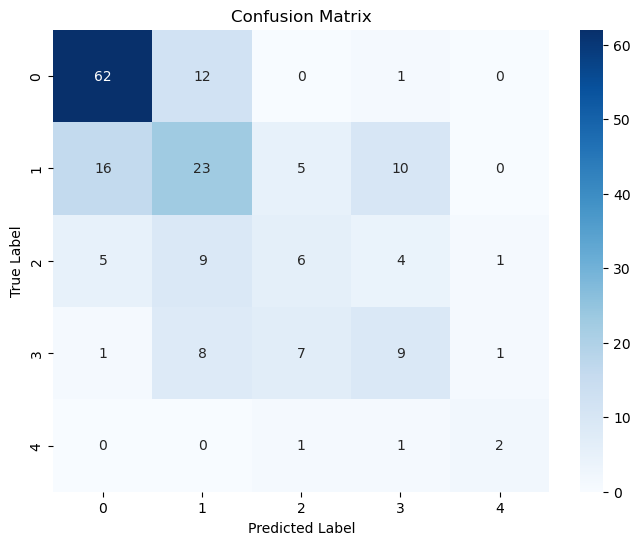

In [59]:
evaluate_model(y_test, y_pred_dt)

 > ### ***8.2 Evaluate XGboost Classifier***

Accuracy score: 0.6086956521739131


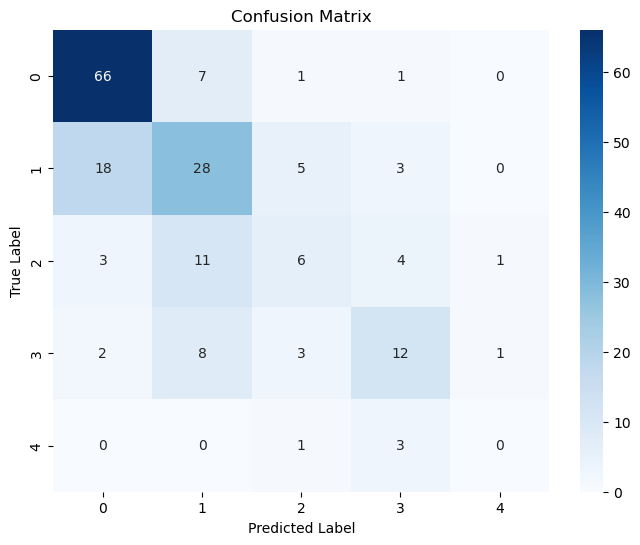

In [60]:
evaluate_model(y_test, y_pred_xgb)

 > ### ***8.3 CatBoost Classifier***

Accuracy score: 0.6413043478260869


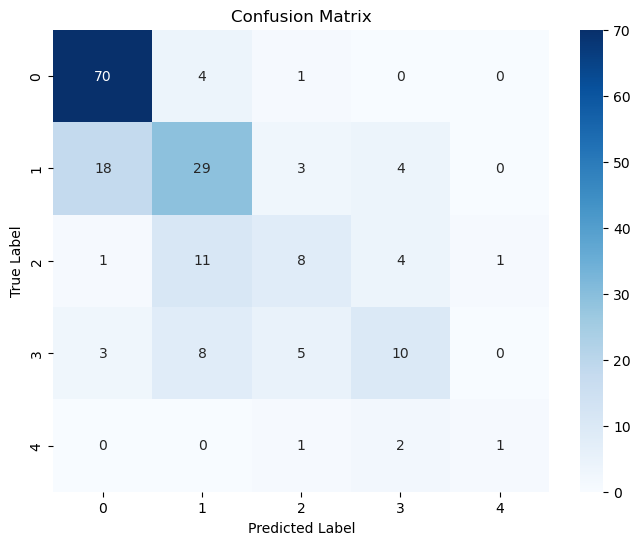

In [61]:
evaluate_model(y_test , y_pred_catboost)

 > ### ***8.4 LightGBM Classifier***

Accuracy score: 0.5978260869565217


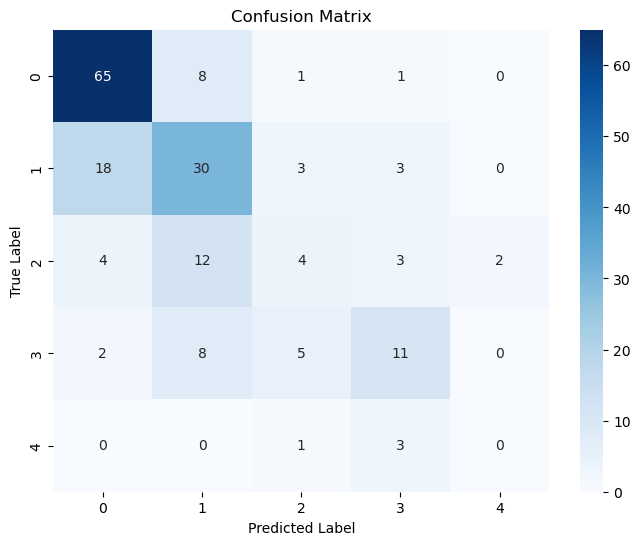

In [62]:
evaluate_model(y_test  , y_pred_lgb )

 > ### ***8.3 XGboost and Catboost Fine Tuninng***

In [63]:

param_grid = {
    'n_estimators': [100, 200],  # Number of trees
    'learning_rate': [0.05, 0.1],  # Learning rate
    'max_depth': [7,10,15],  # Maximum depth of the tree
    'gamma': [0, 0.1],  # Minimum loss reduction required to make a further partition on a leaf node
}


xgb = XGBClassifier(random_state=42)


grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_pre, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train a model with the best parameters
best_xgb = XGBClassifier(**best_params, random_state=42)


In [64]:
best_params

{'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 100}

In [65]:
# from sklearn.model_selection import GridSearchCV
# from catboost import CatBoostClassifier

# # Define the parameter grid to search
# param_grid = {
#     'iterations': [100, 500, 1000],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'depth': [4, 6, 8],
#     'random_state': [42]
# }

# # Create a CatBoostClassifier instance
# catboost = CatBoostClassifier()

# # Create a GridSearchCV instance
# grid_search = GridSearchCV(estimator=catboost, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# # Perform grid search
# grid_search.fit(X_train_pre, y_train)  # X_train and y_train are your training data

# # Get the best parameters and the best score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print("Best Parameters:", best_params)
# print("Best Score:", best_score)


In [147]:
best_params ={'depth': 4, 'iterations': 200, 'learning_rate': 0.1, 'random_state': 42}
catboost_v2 = CatBoostClassifier(**best_params )
catboost_v2.fit(X_train_pre, y_train)
y_pred_catboos_v2 = catboost_v2.predict(X_test_pre)

0:	learn: 1.5058772	total: 1.32ms	remaining: 264ms
1:	learn: 1.4245113	total: 2.7ms	remaining: 267ms
2:	learn: 1.3655686	total: 3.84ms	remaining: 252ms
3:	learn: 1.3097298	total: 5ms	remaining: 245ms
4:	learn: 1.2528238	total: 6.1ms	remaining: 238ms
5:	learn: 1.2156720	total: 7.2ms	remaining: 233ms
6:	learn: 1.1803322	total: 8.32ms	remaining: 229ms
7:	learn: 1.1526451	total: 9.39ms	remaining: 225ms
8:	learn: 1.1241614	total: 10.5ms	remaining: 223ms
9:	learn: 1.0976171	total: 11.6ms	remaining: 221ms
10:	learn: 1.0700986	total: 12.8ms	remaining: 220ms
11:	learn: 1.0528150	total: 13.9ms	remaining: 217ms
12:	learn: 1.0306876	total: 15.1ms	remaining: 217ms
13:	learn: 1.0179814	total: 16.2ms	remaining: 216ms
14:	learn: 1.0033759	total: 18ms	remaining: 223ms
15:	learn: 0.9859953	total: 19.2ms	remaining: 221ms
16:	learn: 0.9747222	total: 20.3ms	remaining: 219ms
17:	learn: 0.9615656	total: 21.5ms	remaining: 217ms
18:	learn: 0.9510387	total: 22.9ms	remaining: 218ms
19:	learn: 0.9428007	total: 24

174:	learn: 0.5547423	total: 194ms	remaining: 27.7ms
175:	learn: 0.5533745	total: 195ms	remaining: 26.6ms
176:	learn: 0.5517347	total: 196ms	remaining: 25.5ms
177:	learn: 0.5506223	total: 197ms	remaining: 24.4ms
178:	learn: 0.5492238	total: 198ms	remaining: 23.3ms
179:	learn: 0.5475801	total: 200ms	remaining: 22.2ms
180:	learn: 0.5464361	total: 201ms	remaining: 21.1ms
181:	learn: 0.5449109	total: 202ms	remaining: 19.9ms
182:	learn: 0.5435582	total: 203ms	remaining: 18.8ms
183:	learn: 0.5421430	total: 204ms	remaining: 17.7ms
184:	learn: 0.5409097	total: 205ms	remaining: 16.6ms
185:	learn: 0.5404742	total: 206ms	remaining: 15.5ms
186:	learn: 0.5388717	total: 207ms	remaining: 14.4ms
187:	learn: 0.5382876	total: 208ms	remaining: 13.3ms
188:	learn: 0.5377833	total: 209ms	remaining: 12.2ms
189:	learn: 0.5367967	total: 210ms	remaining: 11.1ms
190:	learn: 0.5356011	total: 211ms	remaining: 9.96ms
191:	learn: 0.5347097	total: 212ms	remaining: 8.85ms
192:	learn: 0.5342871	total: 214ms	remaining: 

Accuracy score: 0.6521739130434783


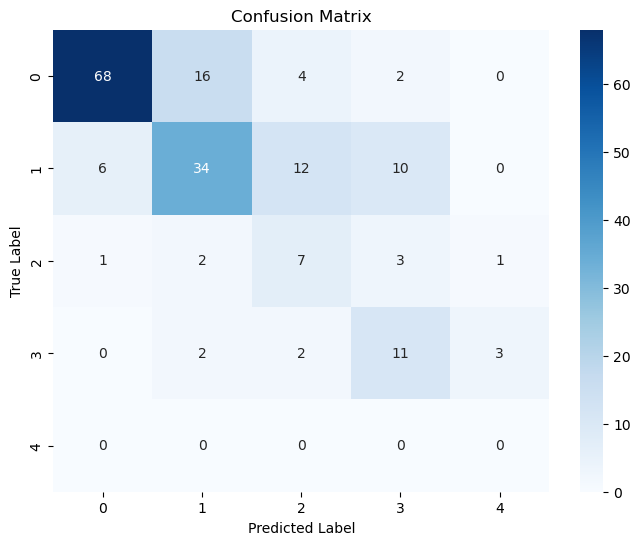

In [149]:
evaluate_model(y_pred_catboos_v2 , y_test)

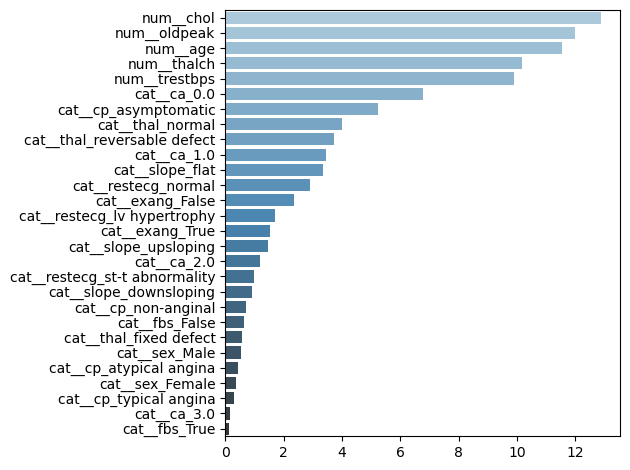

In [102]:
feature_importances = pd.Series(catboost_v2.feature_importances_, index=X_train_pre.columns).sort_values(ascending=False)

sns.barplot(y= feature_importances.index , x = feature_importances.values , palette="Blues_d")
plt.tight_layout()
plt.show()

----
# ***9. Build a Full Pipline to Deploy***
---

In [103]:
full_pipline = Pipeline([
    ('preprocessing' , preprocessor),
    ('cat', catboost_v2) 
])
full_pipline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  ['thal', 'ca', 'slope',
                                                   'exang', 'restecg', 'fbs',
                                                   'cp', 'sex']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['oldpeak', 'thalch', 'chol',
                                                   'trestbps', 'age'])])),
                ('cat',
                 <catboost.core.CatBoostClassifier object at 0x7ab2a65f8280>)])

In [104]:
X_train_pre

cat__thal_fixed defect  cat__thal_normal  cat__thal_reversable defect  \
0                       0.0               0.0                          1.0   
1                       0.0               0.0                          1.0   
2                       0.0               0.0                          1.0   
3                       0.0               1.0                          0.0   
4                       0.0               1.0                          0.0   
..                      ...               ...                          ...   
731                     0.0               0.0                          1.0   
732                     0.0               0.0                          1.0   
733                     0.0               0.0                          1.0   
734                     0.0               1.0                          0.0   
735                     0.0               1.0                          0.0   

     cat__ca_0.0  cat__ca_1.0  cat__ca_2.0  cat__ca_3.0  \
0            1.0          0.0          0.0          0.0   
1            1.0          0.0          0.0          0.0   
2            1.0          0.0          0.0          0.0   
3            1.0          0.0          0.0          0.0   
4            1.0          0.0          0.0          0.0   
..           ...          ...          ...          ...   
731          0.0          1.0          0.0          0.0   
732          0.0          1.0          0.0          0.0   
733          1.0          0.0          0.0          0.0   
734          1.0          0.0          0.0          0.0   
735          0.0          1.0          0.0          0.0   

     cat__slope_downsloping  cat__slope_flat  cat__slope_upsloping  ...  \
0                       1.0              0.0                   0.0  ...   
1                       0.0              0.0                   1.0  ...   
2                       0.0              1.0                   0.0  ...   
3                       0.0              1.0                   0.0  ...   
4                       0.0              0.0                   1.0  ...   
..                      ...              ...                   ...  ...   
731                     0.0              0.0                   1.0  ...   
732                     0.0              0.0                   1.0  ...   
733                     1.0              0.0                   0.0  ...   
734                     0.0              1.0                   0.0  ...   
735                     0.0              0.0                   1.0  ...   

     cat__cp_atypical angina  cat__cp_non-anginal  cat__cp_typical angina  \
0                        0.0                  0.0                     0.0   
1                        0.0                  1.0                     0.0   
2                        0.0                  1.0                     0.0   
3                        0.0                  1.0                     0.0   
4                        1.0                  0.0                     0.0   
..                       ...                  ...                     ...   
731                      0.0                  0.0                     0.0   
732                      0.0                  0.0                     0.0   
733                      0.0                  0.0                     0.0   
734                      1.0                  0.0                     0.0   
735                      0.0                  0.0                     0.0   

     cat__sex_Female  cat__sex_Male  num__oldpeak  num__thalch  num__chol  \
0                0.0            1.0      1.800624    -0.678090  -0.258464   
1                0.0            1.0     -0.848833    -0.599438  -0.010689   
2                0.0            1.0      2.180379     0.102530   1.291280   
3                1.0            0.0      0.564211     0.816296   0.190870   
4                0.0            1.0     -0.672203     1.366859   1.162899   
..               ...            ...           ...          ...        .

In [105]:
X_train

age     sex               cp  trestbps    chol    fbs           restecg  \
880   62    Male     asymptomatic    140.90  170.00  False  st-t abnormality   
457   54    Male      non-anginal    150.00  197.02  False            normal   
797   51    Male      non-anginal    133.98  339.00  False            normal   
25    50  Female      non-anginal    120.00  219.00  False            normal   
84    52    Male  atypical angina    120.00  325.00  False            normal   
..   ...     ...              ...       ...     ...    ...               ...   
106   59    Male     asymptomatic    140.00  177.00  False            normal   
270   61    Male     asymptomatic    140.00  207.00  False    lv hypertrophy   
860   75    Male     asymptomatic    160.00  310.00   True            normal   
435   53  Female  atypical angina    140.00  216.00  False            normal   
102   57  Female     asymptomatic    128.00  303.00  False    lv hypertrophy   

     thalch  exang  oldpeak        slope   ca               thal  
880  120.00   True     3.00  downsloping  0.0  reversable defect  
457  122.00  False     0.00    upsloping  0.0  reversable defect  
797  139.85   True     3.43         flat  0.0  reversable defect  
25   158.00  False     1.60         flat  0.0             normal  
84   172.00  False     0.20    upsloping  0.0             normal  
..      ...    ...      ...          ...  ...                ...  
106  162.00   True     0.00    upsloping  1.0  reversable defect  
270  138.00   True     1.90    upsloping  1.0  reversable defect  
860  112.00   True     2.00  downsloping  0.0  reversable defect  
435  142.00   True     2.00         flat  0.0             normal  
102  159.00  False     0.00    upsloping  1.0             normal  

[736 rows x 13 columns]

In [106]:
full_pipline.fit(X_train , y_train)

0:	learn: 1.4044605	total: 3.35ms	remaining: 3.35s
1:	learn: 1.2559915	total: 7.44ms	remaining: 3.71s
2:	learn: 1.1772166	total: 11.6ms	remaining: 3.86s
3:	learn: 1.1203966	total: 17.6ms	remaining: 4.39s
4:	learn: 1.0630669	total: 21.7ms	remaining: 4.31s
5:	learn: 1.0191263	total: 25ms	remaining: 4.14s
6:	learn: 0.9765177	total: 28.3ms	remaining: 4.01s
7:	learn: 0.9391822	total: 30.4ms	remaining: 3.77s
8:	learn: 0.9098208	total: 33.9ms	remaining: 3.73s
9:	learn: 0.8852576	total: 37.6ms	remaining: 3.73s
10:	learn: 0.8645587	total: 41.1ms	remaining: 3.7s
11:	learn: 0.8448429	total: 44.6ms	remaining: 3.67s
12:	learn: 0.8235640	total: 48ms	remaining: 3.65s
13:	learn: 0.8086150	total: 51.2ms	remaining: 3.61s
14:	learn: 0.7956764	total: 54.1ms	remaining: 3.55s
15:	learn: 0.7810222	total: 57.4ms	remaining: 3.53s
16:	learn: 0.7656151	total: 60.6ms	remaining: 3.5s
17:	learn: 0.7527425	total: 64.1ms	remaining: 3.5s
18:	learn: 0.7382118	total: 67.1ms	remaining: 3.47s
19:	learn: 0.7238479	total: 7

184:	learn: 0.2032826	total: 599ms	remaining: 2.64s
185:	learn: 0.2021679	total: 602ms	remaining: 2.63s
186:	learn: 0.2014728	total: 606ms	remaining: 2.63s
187:	learn: 0.2001664	total: 609ms	remaining: 2.63s
188:	learn: 0.1987549	total: 613ms	remaining: 2.63s
189:	learn: 0.1972432	total: 616ms	remaining: 2.63s
190:	learn: 0.1961562	total: 620ms	remaining: 2.63s
191:	learn: 0.1950217	total: 625ms	remaining: 2.63s
192:	learn: 0.1941989	total: 628ms	remaining: 2.63s
193:	learn: 0.1926070	total: 631ms	remaining: 2.62s
194:	learn: 0.1919037	total: 634ms	remaining: 2.62s
195:	learn: 0.1914750	total: 637ms	remaining: 2.61s
196:	learn: 0.1895070	total: 640ms	remaining: 2.61s
197:	learn: 0.1883624	total: 644ms	remaining: 2.61s
198:	learn: 0.1875323	total: 647ms	remaining: 2.6s
199:	learn: 0.1868853	total: 650ms	remaining: 2.6s
200:	learn: 0.1853549	total: 653ms	remaining: 2.6s
201:	learn: 0.1848021	total: 656ms	remaining: 2.59s
202:	learn: 0.1840970	total: 659ms	remaining: 2.59s
203:	learn: 0.1

367:	learn: 0.0875381	total: 1.19s	remaining: 2.04s
368:	learn: 0.0873509	total: 1.2s	remaining: 2.04s
369:	learn: 0.0870921	total: 1.2s	remaining: 2.04s
370:	learn: 0.0868884	total: 1.2s	remaining: 2.04s
371:	learn: 0.0865668	total: 1.21s	remaining: 2.04s
372:	learn: 0.0861873	total: 1.21s	remaining: 2.03s
373:	learn: 0.0856475	total: 1.21s	remaining: 2.03s
374:	learn: 0.0853966	total: 1.22s	remaining: 2.03s
375:	learn: 0.0850025	total: 1.22s	remaining: 2.03s
376:	learn: 0.0845652	total: 1.23s	remaining: 2.02s
377:	learn: 0.0842050	total: 1.23s	remaining: 2.02s
378:	learn: 0.0839944	total: 1.23s	remaining: 2.02s
379:	learn: 0.0836001	total: 1.24s	remaining: 2.02s
380:	learn: 0.0832436	total: 1.24s	remaining: 2.01s
381:	learn: 0.0830578	total: 1.24s	remaining: 2.01s
382:	learn: 0.0825820	total: 1.24s	remaining: 2s
383:	learn: 0.0823076	total: 1.25s	remaining: 2s
384:	learn: 0.0820816	total: 1.25s	remaining: 2s
385:	learn: 0.0818475	total: 1.25s	remaining: 2s
386:	learn: 0.0814556	total

550:	learn: 0.0498076	total: 1.78s	remaining: 1.45s
551:	learn: 0.0497185	total: 1.79s	remaining: 1.45s
552:	learn: 0.0496753	total: 1.79s	remaining: 1.45s
553:	learn: 0.0494705	total: 1.79s	remaining: 1.44s
554:	learn: 0.0493209	total: 1.8s	remaining: 1.44s
555:	learn: 0.0492607	total: 1.8s	remaining: 1.44s
556:	learn: 0.0491556	total: 1.8s	remaining: 1.44s
557:	learn: 0.0490824	total: 1.81s	remaining: 1.43s
558:	learn: 0.0489959	total: 1.81s	remaining: 1.43s
559:	learn: 0.0488126	total: 1.81s	remaining: 1.43s
560:	learn: 0.0486039	total: 1.82s	remaining: 1.42s
561:	learn: 0.0484645	total: 1.82s	remaining: 1.42s
562:	learn: 0.0483775	total: 1.82s	remaining: 1.42s
563:	learn: 0.0482762	total: 1.83s	remaining: 1.41s
564:	learn: 0.0480962	total: 1.83s	remaining: 1.41s
565:	learn: 0.0479772	total: 1.83s	remaining: 1.41s
566:	learn: 0.0478548	total: 1.84s	remaining: 1.4s
567:	learn: 0.0477380	total: 1.84s	remaining: 1.4s
568:	learn: 0.0476344	total: 1.84s	remaining: 1.4s
569:	learn: 0.0475

732:	learn: 0.0338086	total: 2.38s	remaining: 865ms
733:	learn: 0.0337521	total: 2.38s	remaining: 862ms
734:	learn: 0.0336666	total: 2.38s	remaining: 859ms
735:	learn: 0.0335942	total: 2.38s	remaining: 856ms
736:	learn: 0.0335255	total: 2.39s	remaining: 852ms
737:	learn: 0.0334692	total: 2.39s	remaining: 849ms
738:	learn: 0.0334215	total: 2.4s	remaining: 846ms
739:	learn: 0.0333911	total: 2.4s	remaining: 843ms
740:	learn: 0.0333412	total: 2.4s	remaining: 840ms
741:	learn: 0.0332776	total: 2.41s	remaining: 837ms
742:	learn: 0.0332312	total: 2.41s	remaining: 834ms
743:	learn: 0.0331610	total: 2.41s	remaining: 831ms
744:	learn: 0.0331165	total: 2.42s	remaining: 828ms
745:	learn: 0.0330831	total: 2.42s	remaining: 824ms
746:	learn: 0.0330154	total: 2.42s	remaining: 821ms
747:	learn: 0.0329829	total: 2.43s	remaining: 818ms
748:	learn: 0.0329079	total: 2.43s	remaining: 815ms
749:	learn: 0.0328441	total: 2.43s	remaining: 811ms
750:	learn: 0.0327494	total: 2.44s	remaining: 808ms
751:	learn: 0.0

913:	learn: 0.0251786	total: 2.97s	remaining: 279ms
914:	learn: 0.0251499	total: 2.97s	remaining: 276ms
915:	learn: 0.0251091	total: 2.98s	remaining: 273ms
916:	learn: 0.0250711	total: 2.98s	remaining: 270ms
917:	learn: 0.0250128	total: 2.98s	remaining: 267ms
918:	learn: 0.0249666	total: 2.99s	remaining: 263ms
919:	learn: 0.0249233	total: 2.99s	remaining: 260ms
920:	learn: 0.0248818	total: 3s	remaining: 257ms
921:	learn: 0.0248600	total: 3s	remaining: 254ms
922:	learn: 0.0248240	total: 3s	remaining: 250ms
923:	learn: 0.0247995	total: 3s	remaining: 247ms
924:	learn: 0.0247810	total: 3.01s	remaining: 244ms
925:	learn: 0.0247436	total: 3.01s	remaining: 241ms
926:	learn: 0.0247157	total: 3.01s	remaining: 237ms
927:	learn: 0.0246799	total: 3.02s	remaining: 234ms
928:	learn: 0.0246567	total: 3.02s	remaining: 231ms
929:	learn: 0.0246220	total: 3.02s	remaining: 228ms
930:	learn: 0.0245909	total: 3.03s	remaining: 224ms
931:	learn: 0.0245498	total: 3.03s	remaining: 221ms
932:	learn: 0.0245262	to

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  ['thal', 'ca', 'slope',
                                                   'exang', 'restecg', 'fbs',
                                                   'cp', 'sex']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['oldpeak', 'thalch', 'chol',
                                                   'trestbps', 'age'])])),
                ('cat',
                 <catboost.core.CatBoostClassifier object at 0x7ab2a65f8280>)])

In [107]:
y_predict = full_pipline.predict(X_test)

----
# ***10. Save a Pipline***
---

In [108]:
joblib.dump(full_pipline, 'heart_disease_pipline.pkl')

['heart_disease_pipline.pkl']

In [109]:
df = pd.read_csv('heart_disease_uci.csv')

In [110]:
model = joblib.load('heart_disease_pipline.pkl')

In [115]:
accuracy_score(model.predict(X_train ) , y_train)

1.0

In [116]:
accuracy_score(model.predict(X_test) , y_test)

0.657608695652174

---
# ***The End***
--- 
***Hopefully, this notebook will be useful for everyone. Upvote if you like the work. Also, comment your feedback below, which would help me improve.*** 